# Notebook to plot fairness and performance metrics

# Import Libraries

In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  import sys
  path_to_project = '/content/drive/MyDrive/FairAlgorithm'
  sys.path.append(path_to_project)
  !sudo apt install libcairo2-dev pkg-config python3-dev
  IN_COLAB = True
except:
  IN_COLAB = False

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 

In [2]:
from source.utils.config import *
from source.utils.plot_utils import *

# Configure Notebook

In [3]:
dataset_list = ['diabetes-women', 'stroke-prediction', 'diabetes-prediction', 'sepsis', 'aids', 'myocardial-infarction', 'alzheimer-disease'] #options: "diabetes-women", "sepsis", 'aids', "myocardial-infarction", 'alzheimer-disease', "diabetes-prediction", "stroke-prediction"
print(datasets_config)

#dataset_list = datasets_config.keys()
metrics = fairness_catalogue
perf_metrics = performance_metrics

{'diabetes-women': {'ignore_cols': ['Age'], 'target_variable': 'Outcome', 'target_variable_labels': [1, 0], 'sensible_attributes': ['AgeCategory'], 'default_mappings': {'Age': {'label_maps': [{1.0: 'Diabetic', 0.0: 'NonDiabetic'}], 'protected_attribute_maps': [{1.0: 'Adult', 0.0: 'Young'}]}}, 'n_splits': 5}, 'sepsis': {'ignore_cols': [], 'target_variable': 'Mortality', 'target_variable_labels': [1, 0], 'sensible_attributes': ['Gender_cat', 'Age_cat'], 'default_mappings': {'Gender_cat': {'label_maps': [{1.0: 'Death', 0.0: 'Censored'}], 'protected_attribute_maps': [{1.0: 'Male', 0.0: 'Female'}]}, 'Age_cat': {'label_maps': [{1.0: 'Death', 0.0: 'Censored'}], 'protected_attribute_maps': [{1.0: 'Adult', 0.0: 'Young'}]}}, 'n_splits': 5}, 'aids': {'ignore_cols': [], 'target_variable': 'cid', 'target_variable_labels': [1, 0], 'sensible_attributes': ['homo_cat', 'race_cat', 'age_cat'], 'default_mappings': {'homo_cat': {'label_maps': [{1.0: 'Death', 0.0: 'Censored'}], 'protected_attribute_maps': 

#Load metrics

In [4]:
overall_metrics, preprocessing_metrics, inprocessing_metrics, postprocessing_metrics, performance_metrics = load_array_metrics(dataset_list, all_mitigations, preprocessing_mitigation_list, inprocessing_mitigation_list, postprocessing_mitigation_list)
print(overall_metrics)

diabetes-women
metrics mitigation loaded
original metrics  loaded
stroke-prediction
metrics mitigation loaded
original metrics  loaded
diabetes-prediction
metrics mitigation loaded
original metrics  loaded
sepsis
metrics mitigation loaded
original metrics  loaded
sepsis
metrics mitigation loaded
original metrics  loaded
aids
metrics mitigation loaded
original metrics  loaded
aids
metrics mitigation loaded
original metrics  loaded
aids
metrics mitigation loaded
original metrics  loaded
myocardial-infarction
metrics mitigation loaded
original metrics  loaded
alzheimer-disease
metrics mitigation loaded
original metrics  loaded
alzheimer-disease
metrics mitigation loaded
original metrics  loaded
{'diabetes-women': {'AgeCategory': {'fl-cr': {'division': {'Logistic Regression': {'GroupFairness': [0.1749144978724659, 0.021141870209744423], 'PredictiveParity': [0.10805499685072692, 0.04021046974321338], 'PredictiveEquality': [0.13758664843411, 0.1394394319024411], 'EqualOpportunity': [-0.86700

# Preprocessing results

In [5]:
print(preprocessing_mitigation_list)
preprocessing_mitigation_list.insert(0, 'original')
print(preprocessing_mitigation_list)

['fl-cr', 'aif360-rw', 'aif360-di', 'aif360-lfr', 'aif360-op']
['original', 'fl-cr', 'aif360-rw', 'aif360-di', 'aif360-lfr', 'aif360-op']


## Test plots

In [6]:
def grouped_line_plot(metrics_dict, mitigation_list, comparison, model, mitigation_category, dataset_name, sensible_attribute):
    plt.figure(figsize=(12, 6))  # Create a figure

    # Iterate through each mitigation and plot a line for each
    for mitigation in mitigation_list:
        values = []
        for metric in metrics:
            values.append(metrics_dict[mitigation][comparison][model][metric][0])

        # Plot each mitigation as a line
        plt.plot(
            list(map(map_metric, metrics)),  # Map metrics for x-axis
            values,
            marker='o',  # Add markers to the line
            label=map_mitigation(mitigation)  # Add mitigation label
        )

    # Add red threshold lines
    threshold_high = 0.15
    threshold_low = -0.15
    plt.axhline(y=threshold_high, color='red', linestyle='--')#, label='Threshold (+0.15)')
    plt.axhline(y=threshold_low, color='red', linestyle='--')#, label='Threshold (-0.15)')

    # Add labels, title, and legend
    plt.xlabel('Fairness Metrics', fontsize=14)
    plt.ylabel('Fairness Metric Values', fontsize=14)
    plt.title(f"{dataset_name} {sensible_attribute} {model} {comparison} {mitigation_category}", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=10, loc='best')

    # Save the plot as a PDF
    model_no_spaces = model.replace(" ", "")
    configuration = f"{dataset_name}-{sensible_attribute}"
    pdf_file_name = f"{mitigation_category}-{model_no_spaces}-{comparison}.pdf"
    pdf_path = os.path.join(path_to_project, 'plots', configuration, pdf_file_name)
    #plt.savefig(pdf_path, bbox_inches="tight")

    # Show the plot
    plt.show()

In [7]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_line_plot(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "division", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
def grouped_scatter_plot(metrics_dict, mitigation_list, comparison, model, mitigation_category, dataset_name, sensible_attribute):
    plt.figure(figsize=(12, 6))  # Create a figure

    # Define colors for different mitigation methods
    color_map = plt.cm.get_cmap("tab10", len(mitigation_list))  # Use a colormap for variety

    # Iterate through each mitigation and plot a scatter point for each
    for idx, mitigation in enumerate(mitigation_list):
        values = []
        for metric in metrics:
            values.append(metrics_dict[mitigation][comparison][model][metric][0])

        # Scatter plot for each mitigation method with a different color
        plt.scatter(
            list(map(map_metric, metrics)),  # x-axis labels (metrics)
            values,                          # y-axis values
            label=map_mitigation(mitigation),  # Label for the legend
            color=color_map(idx),  # Use different color for each mitigation
            s=100,  # Size of the scatter points
            edgecolor='black',  # Add black border for visibility
            marker='^'  # Marker style
        )

    # Add red threshold lines
    threshold_high = 0.15
    threshold_low = -0.15
    plt.axhline(y=threshold_high, color='red', linestyle='--')#, label='Threshold (+0.15)')
    plt.axhline(y=threshold_low, color='red', linestyle='--')#, label='Threshold (-0.15)')

    # Add labels, title, and legend
    plt.xlabel('Fairness Metrics', fontsize=14)
    plt.ylabel('Fairness Metric Values', fontsize=14)
    plt.title(f"{dataset_name} {sensible_attribute} {model} {comparison} {mitigation_category}", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=10, loc='best')

    # Save the plot as a PDF
    model_no_spaces = model.replace(" ", "")
    configuration = f"{dataset_name}-{sensible_attribute}"
    pdf_file_name = f"{mitigation_category}-{model_no_spaces}-{comparison}.pdf"
    pdf_path = os.path.join(path_to_project, 'plots', configuration, pdf_file_name)
    #plt.savefig(pdf_path, bbox_inches="tight")

    # Show the plot
    plt.show()


In [9]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_scatter_plot(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "division", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
def grouped_scatter_plot(metrics_dicts, mitigation_list, comparison, model, mitigation_category):
    plt.figure(figsize=(12, 6))  # Create a figure

    # Define a list of markers (shapes) to use for different dictionaries
    marker_shapes = ['o', 's', '^']  # Circle, Square, Triangle

    # Define colors for different mitigation methods
    color_map = plt.cm.get_cmap("tab10", len(mitigation_list))  # Use a colormap for variety

    # Iterate through each metrics_dict (the different datasets)
    for idx, (metrics_dict, label) in enumerate(metrics_dicts.items()):
        # Iterate through each mitigation method and plot a scatter point for each
        for mitigation in mitigation_list:
            values = []
            for metric in metrics:
                values.append(metrics_dict[mitigation][comparison][model][metric][0])

            # Scatter plot for each mitigation method with a different color and shape
            plt.scatter(
                list(map(map_metric, metrics)),  # x-axis labels (metrics)
                values,                          # y-axis values
                label=f"{label} - {map_mitigation(mitigation)}",  # Label for the legend
                color=color_map(idx),  # Use different color for each mitigation
                s=100,  # Size of the scatter points
                edgecolor='black',  # Add black border for visibility
                marker=marker_shapes[idx],  # Use different shape based on the dictionary
                alpha=0.7  # Add transparency for better readability when overlapping
            )

    # Add red threshold lines
    threshold_high = 0.15
    threshold_low = -0.15
    plt.axhline(y=threshold_high, color='red', linestyle='--', label='Threshold (+0.15)')
    plt.axhline(y=threshold_low, color='red', linestyle='--', label='Threshold (-0.15)')

    # Add labels, title, and legend
    plt.xlabel('Fairness Metrics', fontsize=14)
    plt.ylabel('Fairness Metric Values', fontsize=14)
    plt.title(f"{dataset_name} {sensible_attribute} {model} {comparison} {mitigation_category}", fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(fontsize=10, loc='best')

    # Save the plot as a PDF
    model_no_spaces = model.replace(" ", "")
    configuration = f"{dataset_name}-{sensible_attribute}"
    pdf_file_name = f"{mitigation_category}-{model_no_spaces}-{comparison}.pdf"
    pdf_path = os.path.join(path_to_project, 'plots', configuration, pdf_file_name)
    plt.savefig(pdf_path, bbox_inches="tight")

    # Show the plot
    plt.show()


In [11]:
# for dataset_name in dataset_list:
#   for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
#     for m in models:
#       grouped_scatter_plot(preprocessing_metrics, preprocessing_mitigation_list, "division", m, 'preprocessing')

<ipython-input-10-a620edc00e64>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", len(mitigation_list))  # Use a colormap for variety


TypeError: string indices must be integers

<Figure size 1200x600 with 0 Axes>

In [12]:
for idx, (metrics_dict, label) in enumerate(preprocessing_metrics.items()):
  print(idx, metrics_dict, label)

0 diabetes-women {'AgeCategory': {'fl-cr': {'division': {'Logistic Regression': {'GroupFairness': [0.1749144978724659, 0.021141870209744423], 'PredictiveParity': [0.10805499685072692, 0.04021046974321338], 'PredictiveEquality': [0.13758664843411, 0.1394394319024411], 'EqualOpportunity': [-0.8670089035052537, 0.1838068236493997], 'EqualizedOdds': [0.07843091762245308, 0.04429379165429436], 'ConditionalUseAccuracyEquality': [0.022537604149660825, 0.07589027520300667], 'OverallAccuracyEquality': [0.10704024513226315, 0.038403473384928465], 'TreatmentEquality': [-0.801332405289848, 0.24727839783923167], 'FORParity': [-0.516008316008316, 0.5929121479995488], 'FN': [-0.8227485624188462, 0.23554453788115606], 'FP': [-0.3572589595347395, 0.23347993038529294]}, 'Decision Tree': {'GroupFairness': [0.21598882447607304, 0.06267430289789226], 'PredictiveParity': [0.120923951293748, 0.025926674538652484], 'PredictiveEquality': [0.23528601733304977, 0.14419821168926064], 'EqualOpportunity': [-0.56586

### Performance metrics

In [13]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      perf_grouped_bar(performance_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [14]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', "Logistic Regression", preprocessing_mitigation_list)

accuracy      precision         recall       f1_score
Mitigation                                                            
original    0.778+/-0.044  0.711+/-0.037  0.559+/-0.054  0.624+/-0.034
fl-cr       0.776+/-0.041  0.713+/-0.043  0.544+/-0.048  0.616+/-0.035
aif360-rw   0.784+/-0.035  0.747+/-0.040  0.528+/-0.063  0.616+/-0.034
aif360-di   0.782+/-0.040  0.724+/-0.042  0.553+/-0.054  0.625+/-0.039
aif360-lfr  0.676+/-0.030  0.842+/-0.086  0.179+/-0.093  0.280+/-0.123
aif360-op   0.738+/-0.044  0.603+/-0.056  0.677+/-0.023  0.636+/-0.027

In [15]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', "Bagging", preprocessing_mitigation_list)

accuracy      precision         recall       f1_score
Mitigation                                                            
original    0.772+/-0.046  0.747+/-0.070  0.485+/-0.064  0.583+/-0.039
fl-cr       0.751+/-0.045  0.736+/-0.076  0.392+/-0.054  0.508+/-0.048
aif360-rw   0.787+/-0.041  0.773+/-0.025  0.506+/-0.086  0.607+/-0.060
aif360-di   0.760+/-0.037  0.744+/-0.062  0.419+/-0.062  0.532+/-0.051
aif360-lfr  0.899+/-0.008  0.820+/-0.017  0.937+/-0.013  0.874+/-0.011
aif360-op   0.735+/-0.046  0.599+/-0.057  0.677+/-0.023  0.633+/-0.028

### all pre-processing techniques, division, all ML models

In [16]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "division", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [17]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar_std_dev(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "division", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

## Display division fairness metrics in a dataframe

In [18]:
for dataset in dataset_list:
  for sensible_attribute in datasets_config[dataset]['sensible_attributes']:
    for m in models:
      df = data_framing(preprocessing_metrics, dataset, sensible_attribute, "division", m, preprocessing_mitigation_list)
      display(df)

/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


### all pre-processing techniques, subtraction, all ML models

In [19]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "subtraction", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar_std_dev(preprocessing_metrics[dataset_name][sensible_attribute], preprocessing_mitigation_list, "subtraction", m, 'preprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

## Display subtraction fairness metrics in a dataframe

In [21]:
for dataset in dataset_list:
  for sensible_attribute in datasets_config[dataset]['sensible_attributes']:
    for m in models:
      df = data_framing(preprocessing_metrics, dataset, sensible_attribute, "subtraction", m, preprocessing_mitigation_list)
      display(df)

/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


# In-processing results

In [22]:
print(inprocessing_mitigation_list)

['aif360-ad', 'aif360-er', 'aif360-pr']


In [23]:
for m in models:
  inprocessing_mitigation_list.insert(0, 'orig-'+str(m))

### Performance

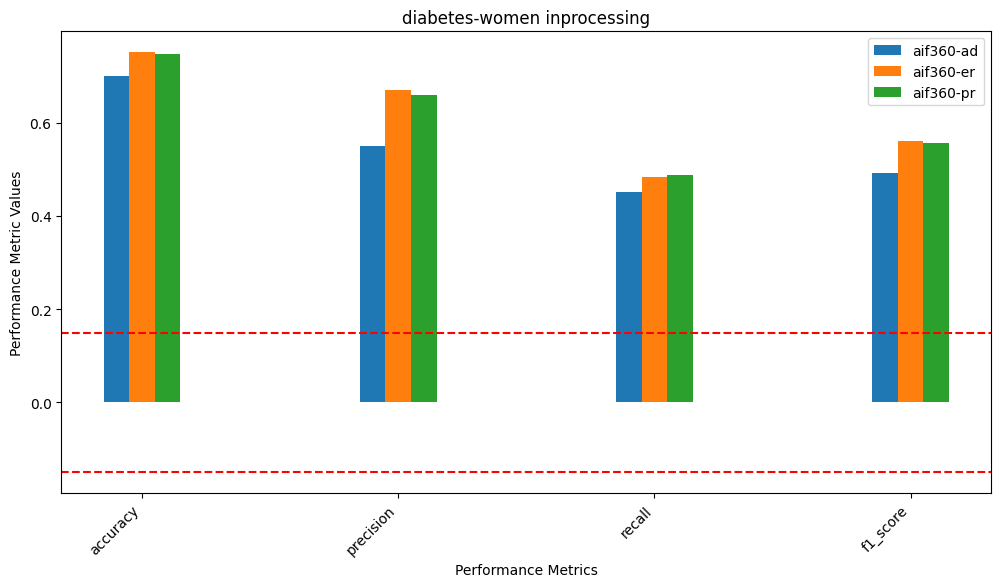

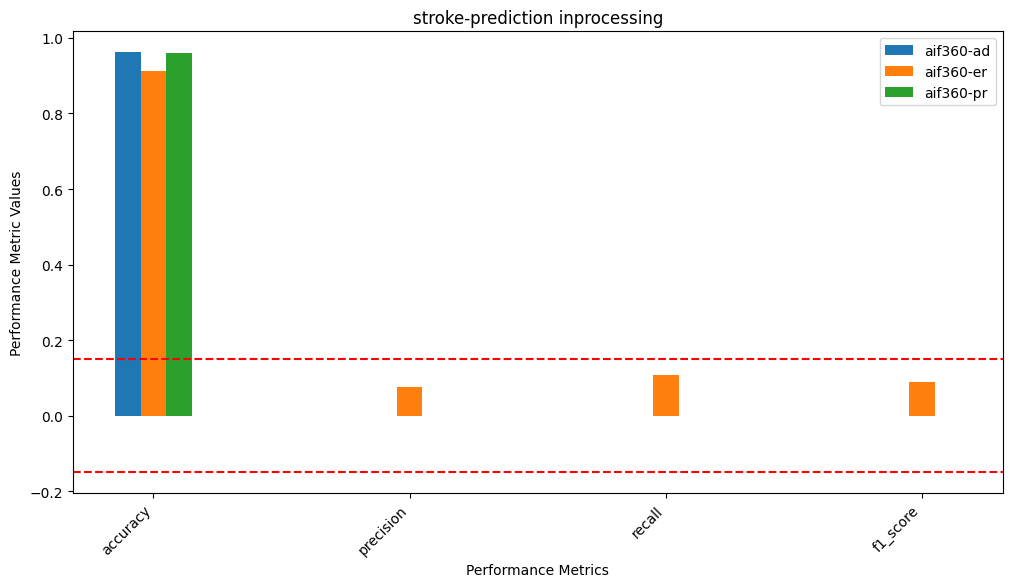

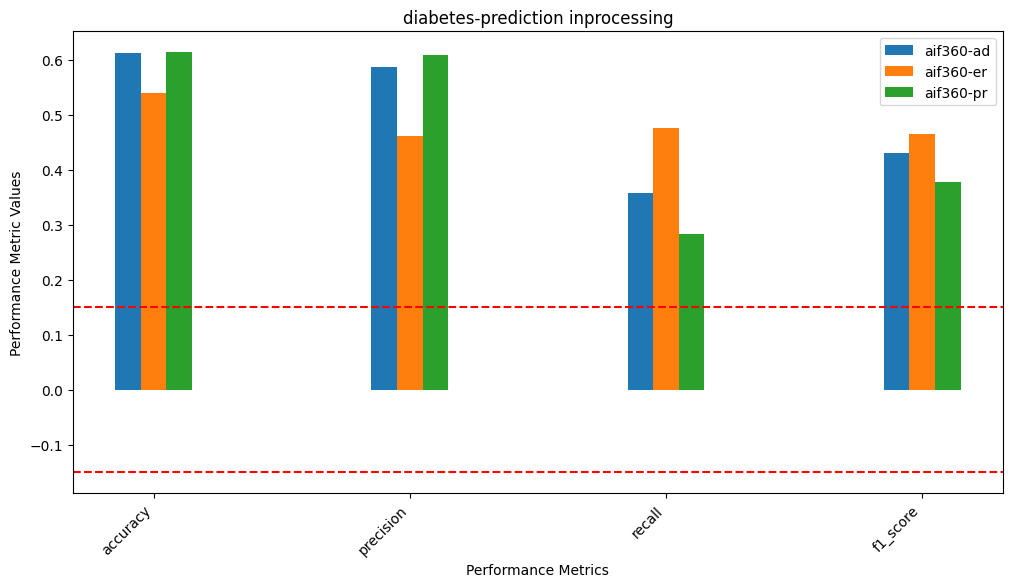

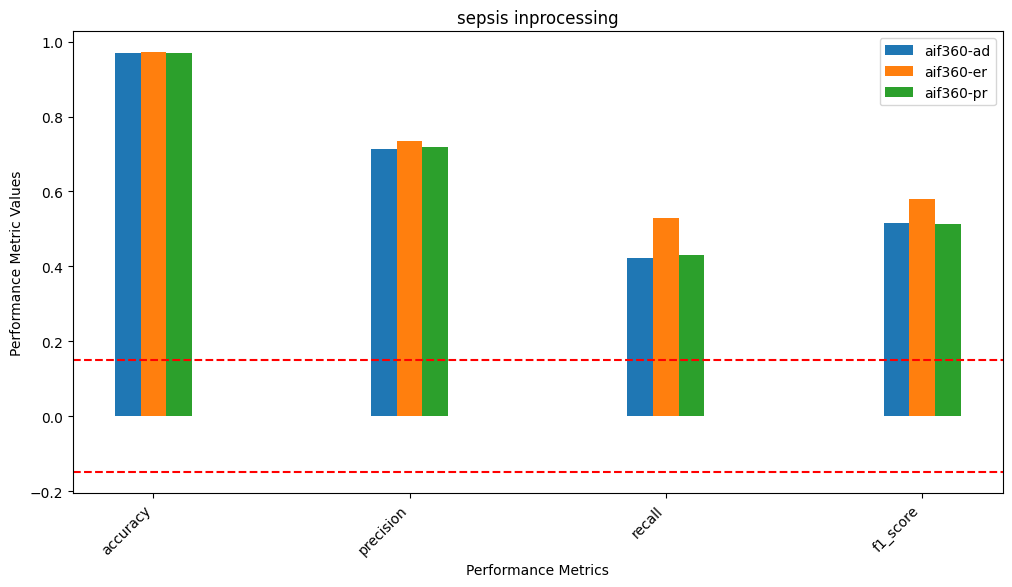

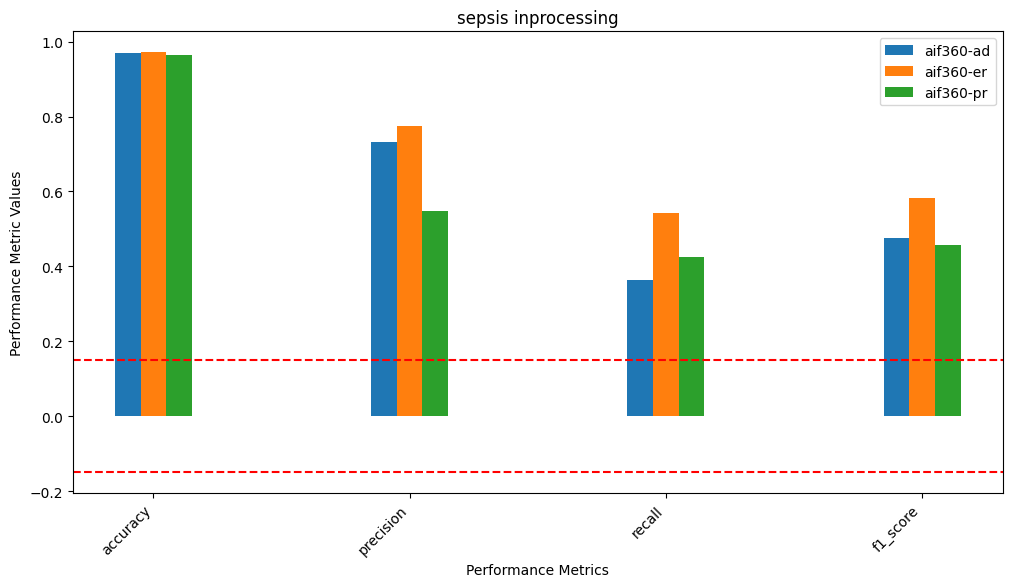

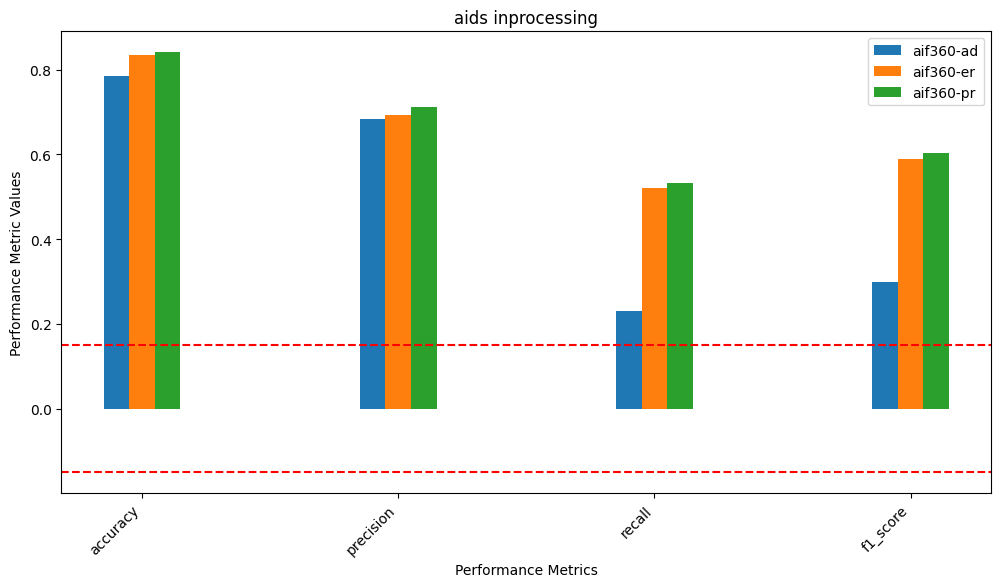

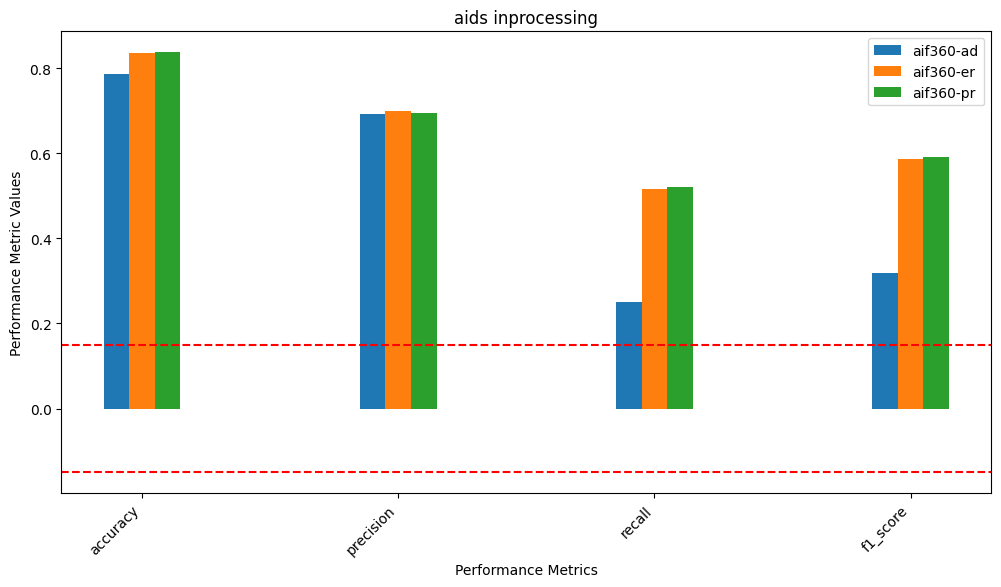

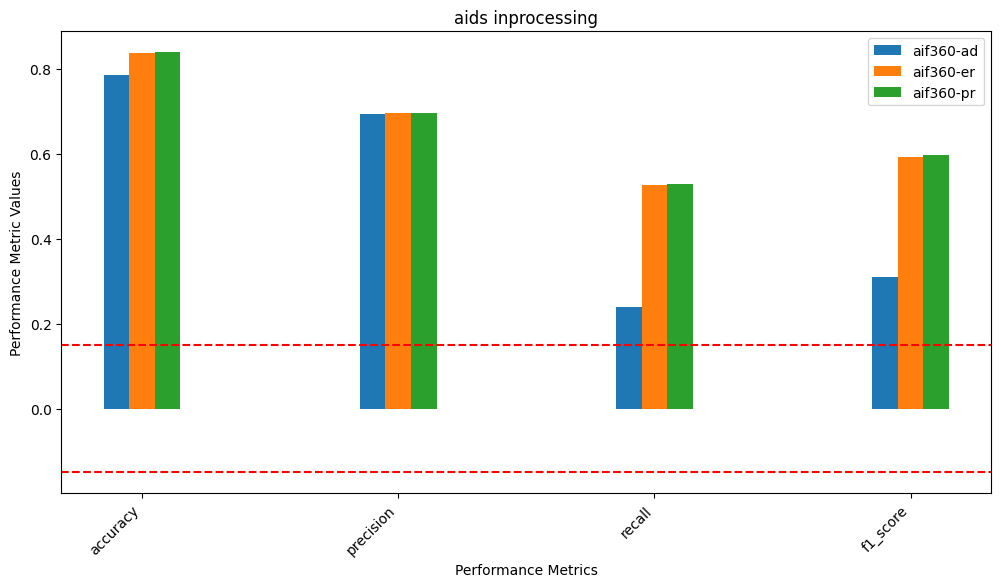

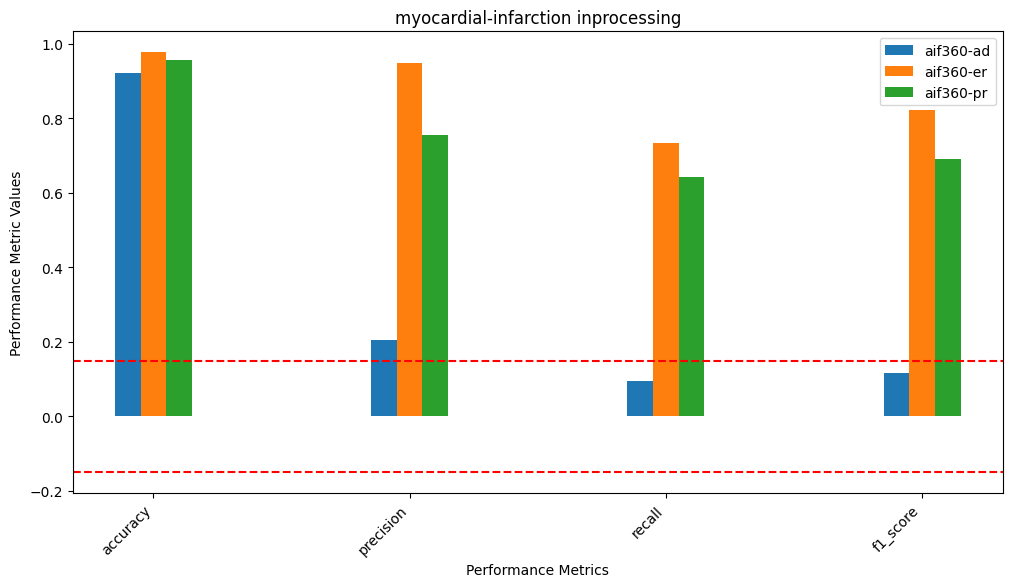

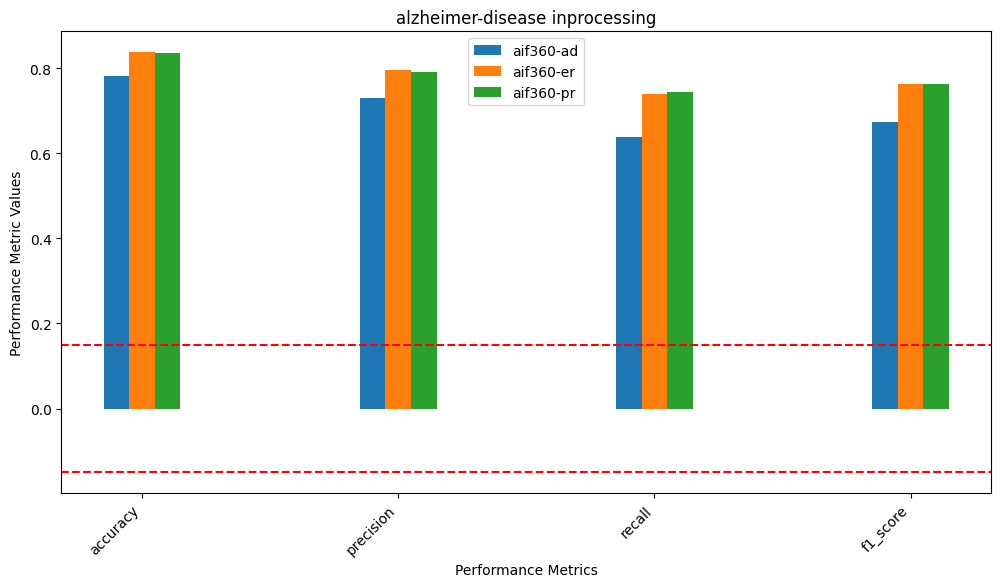

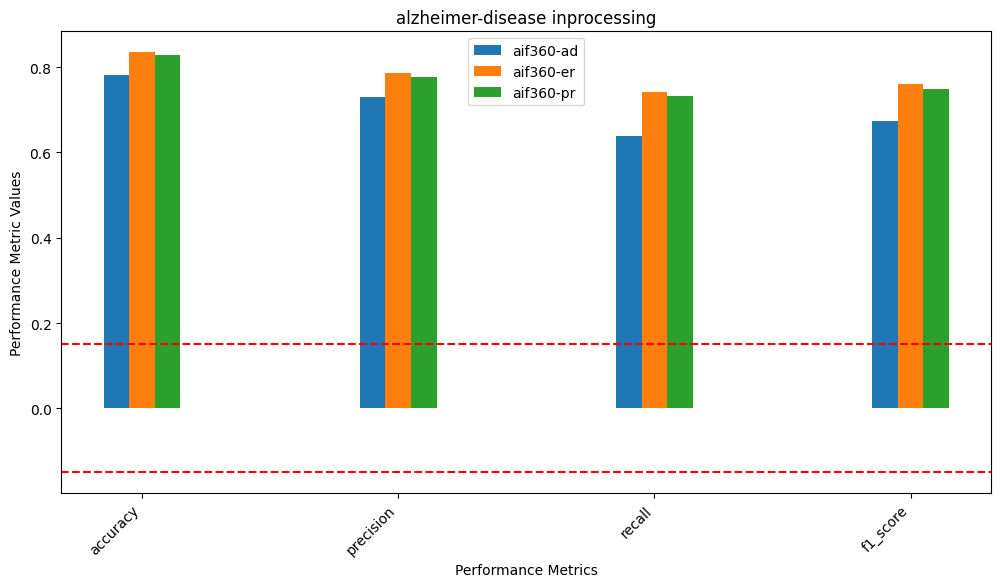

In [24]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    perf_grouped_bar_no_model(performance_metrics[dataset_name][sensible_attribute], ["aif360-ad", "aif360-er",'aif360-pr'], 'inprocessing', dataset_name, sensible_attribute)
    #'orig-Logistic Regression','orig-Bagging','orig-Random Forest', 'orig-Extremely Randomized Trees','orig-Decision Tree', 'orig-Ada Boost'

In [25]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', None, ["aif360-ad", "aif360-er",'aif360-pr'])

accuracy      precision         recall       f1_score
Mitigation                                                            
aif360-ad   0.701+/-0.015  0.550+/-0.096  0.452+/-0.088  0.492+/-0.077
aif360-er   0.751+/-0.033  0.671+/-0.067  0.484+/-0.039  0.560+/-0.032
aif360-pr   0.747+/-0.032  0.659+/-0.074  0.488+/-0.028  0.558+/-0.025

### all in-processing techniques, division, no ML models

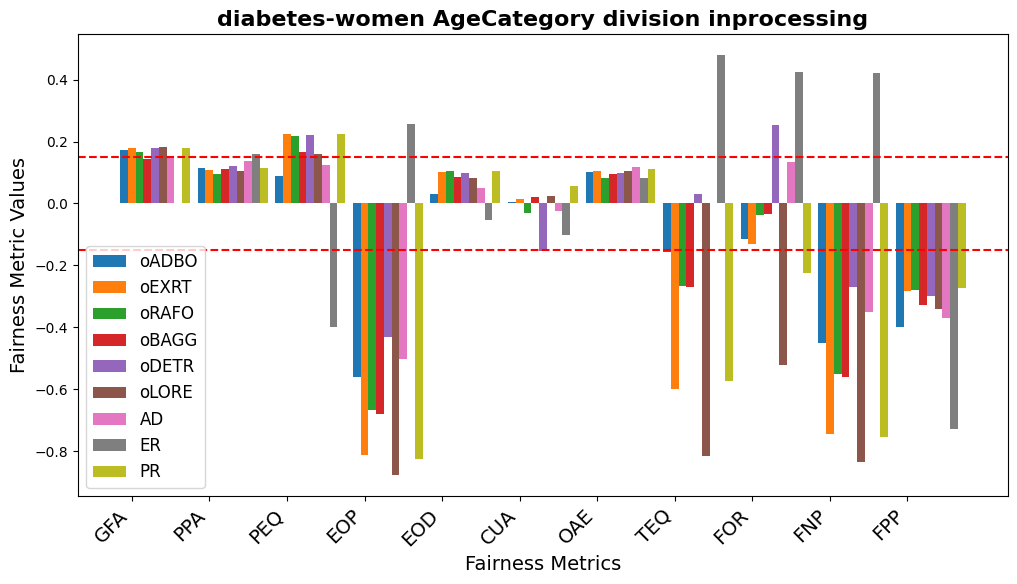

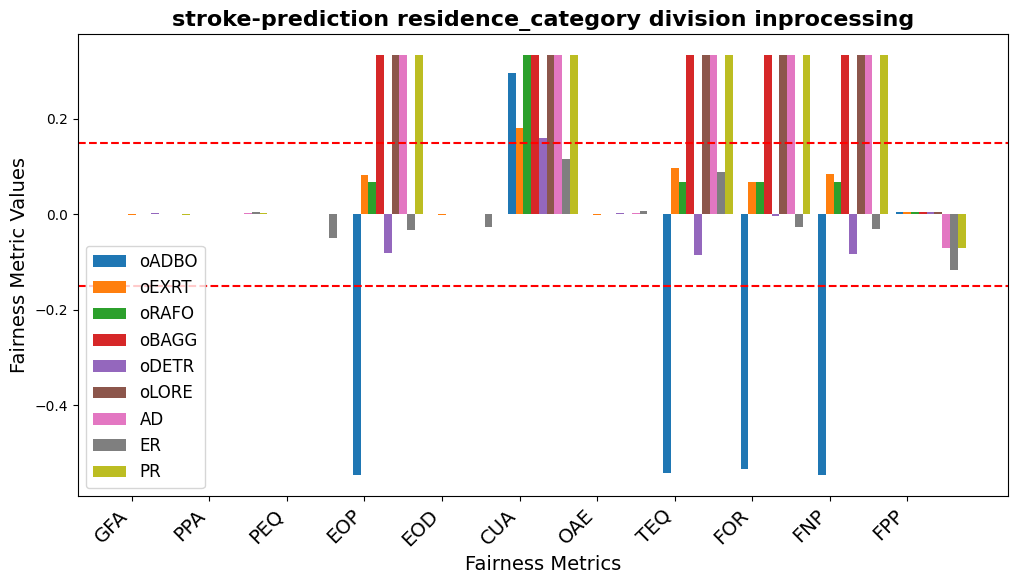

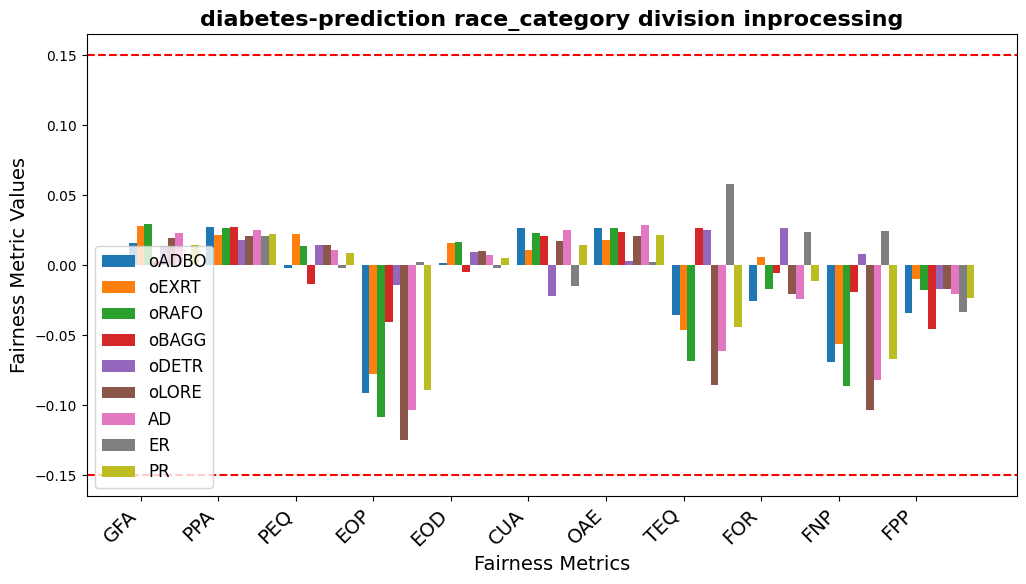

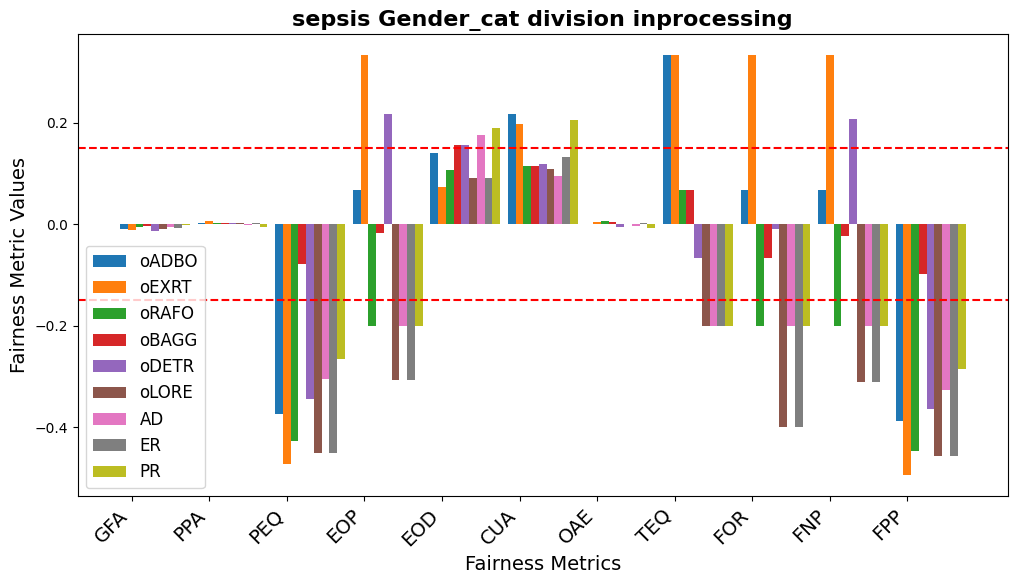

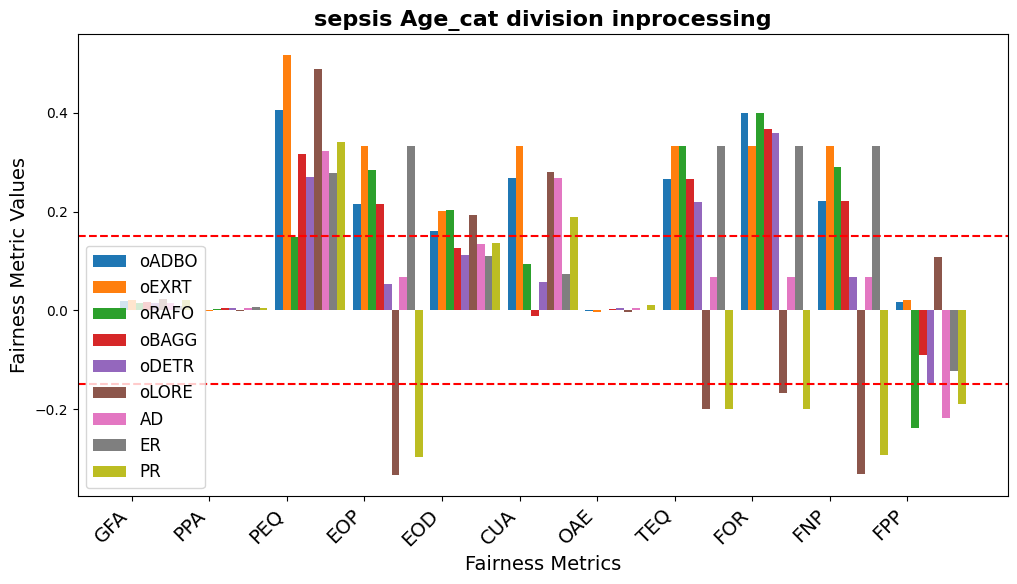

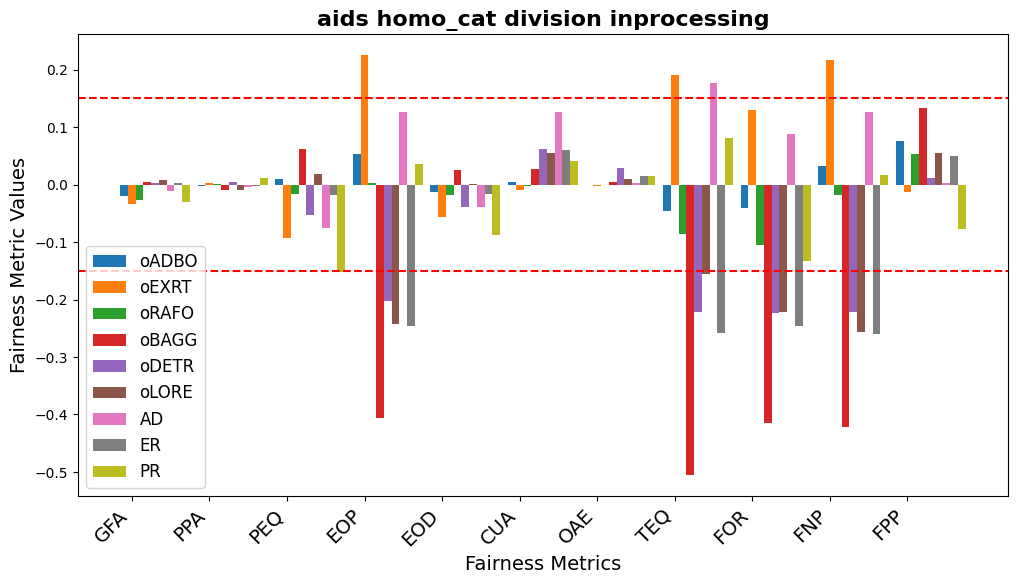

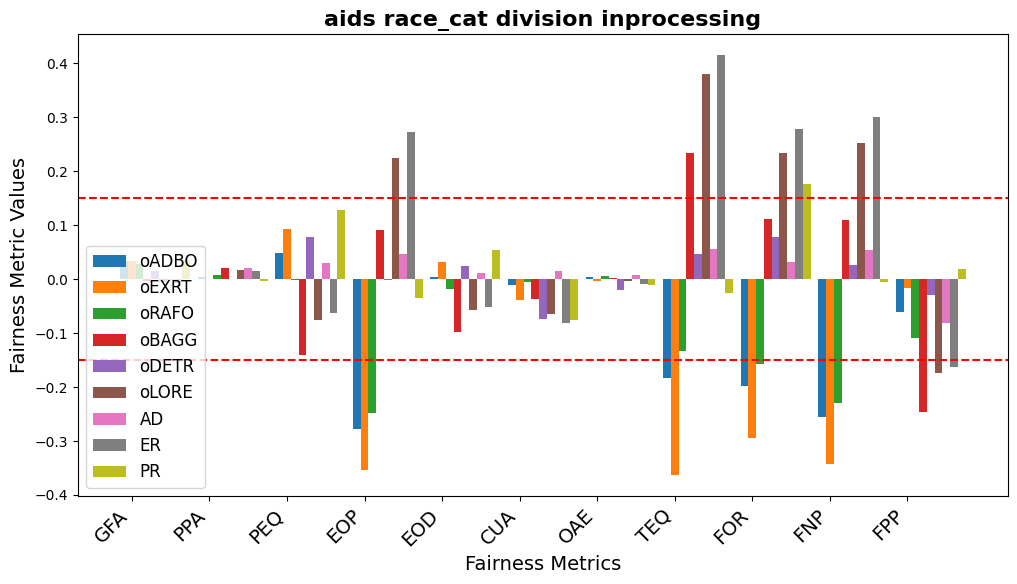

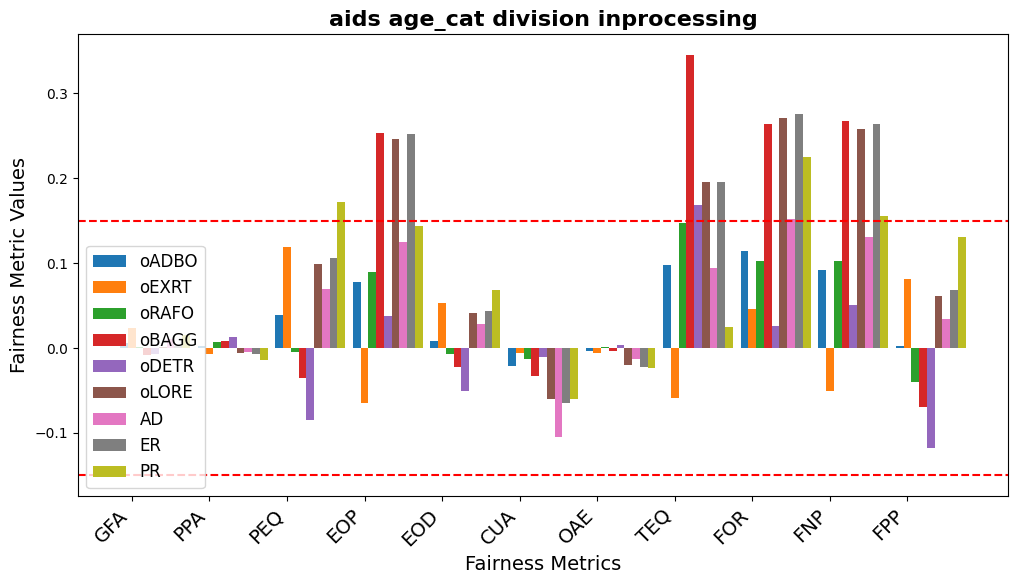

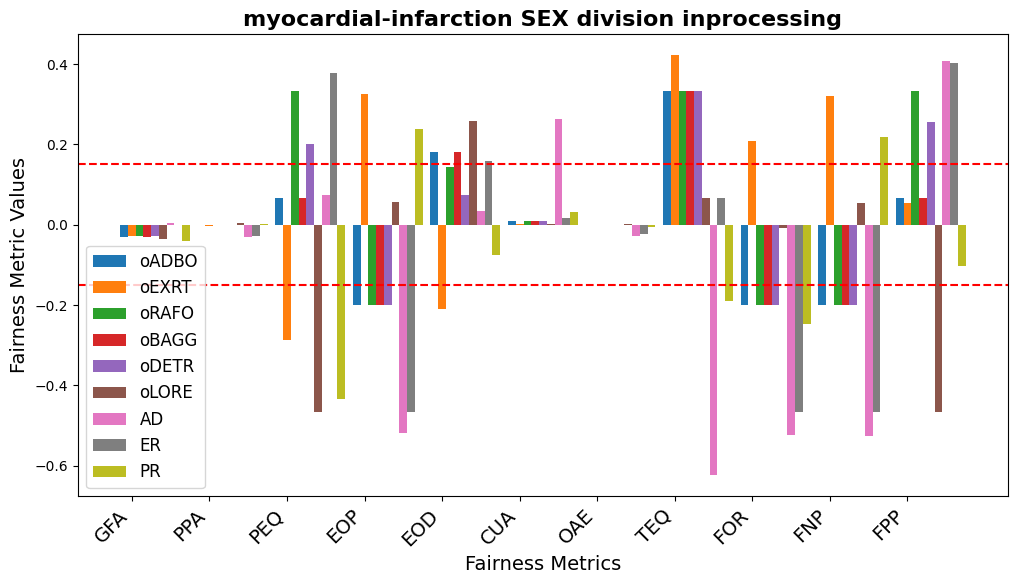

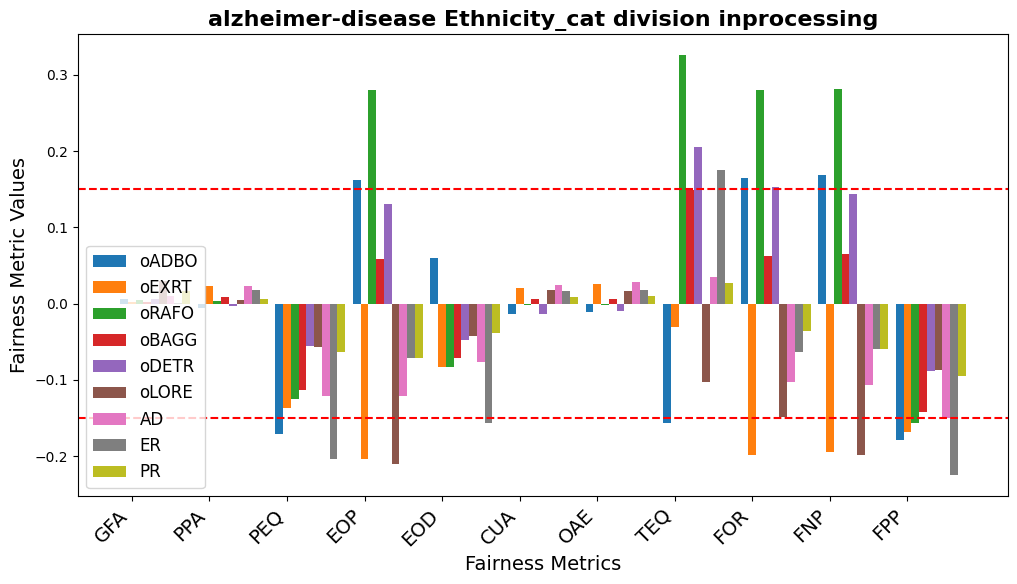

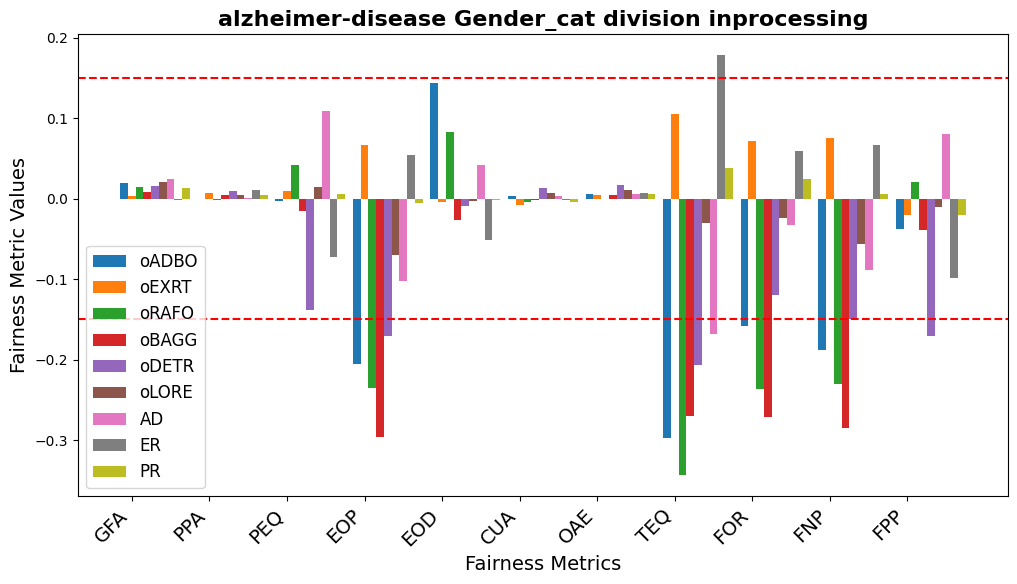

In [26]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    grouped_bar_no_model(inprocessing_metrics[dataset_name][sensible_attribute], inprocessing_mitigation_list, "division", 'inprocessing', dataset_name, sensible_attribute)

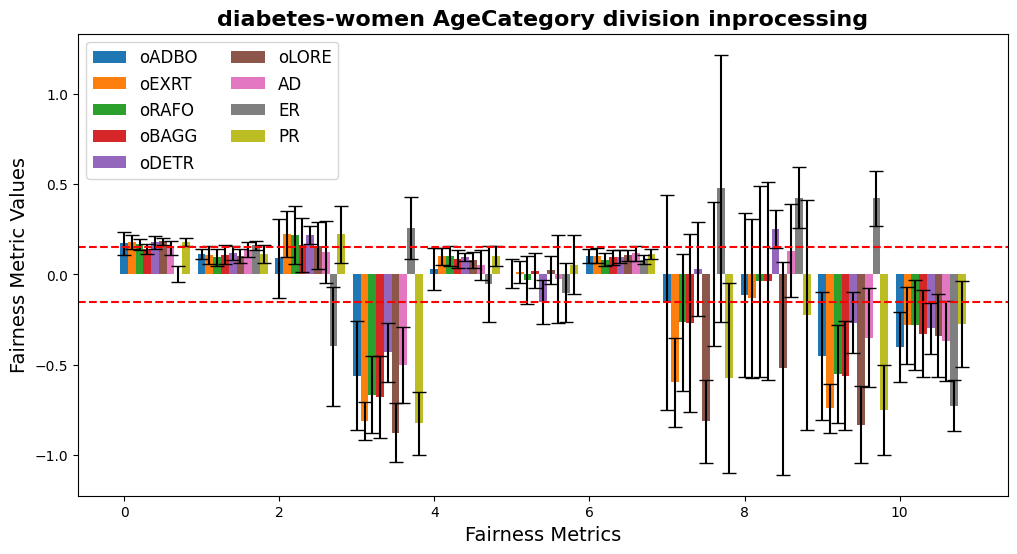

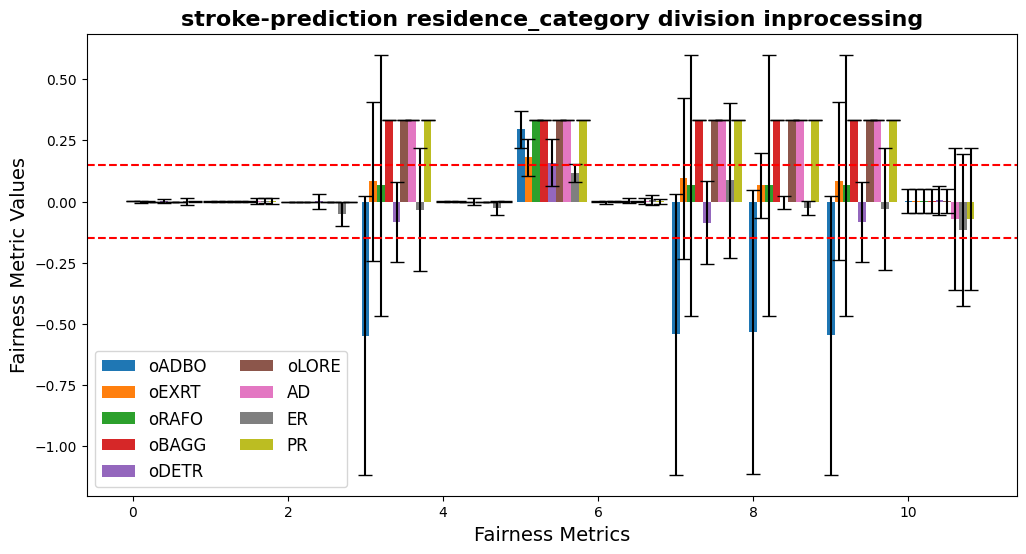

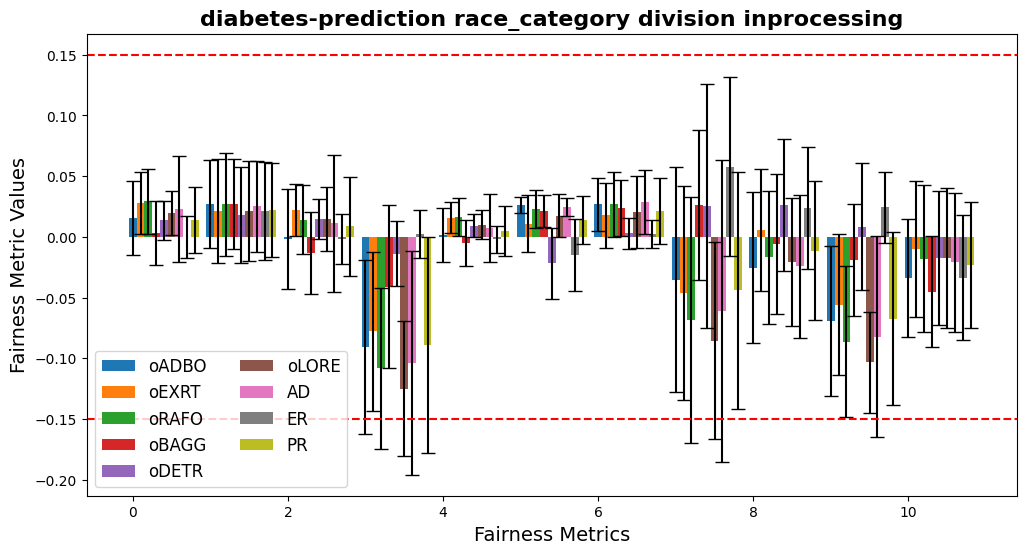

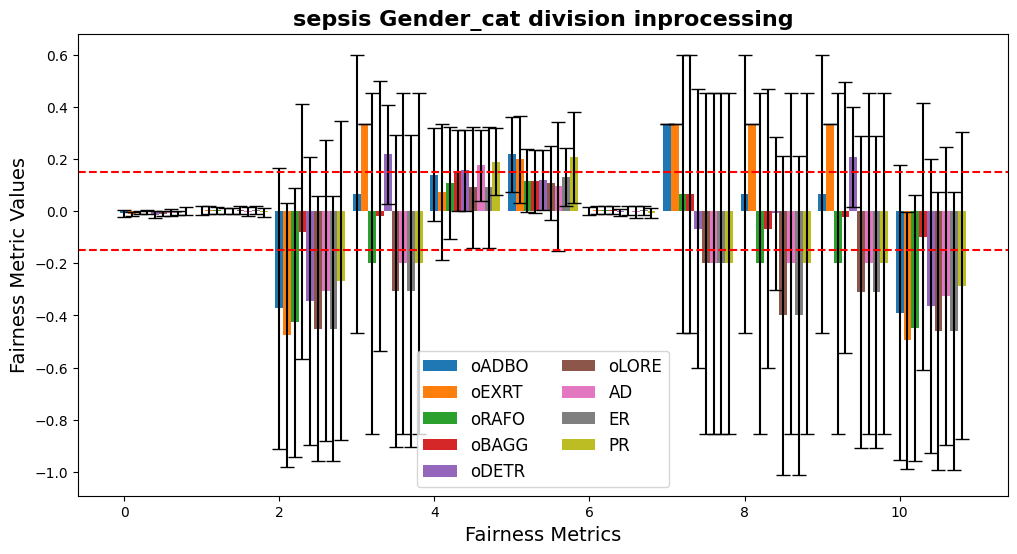

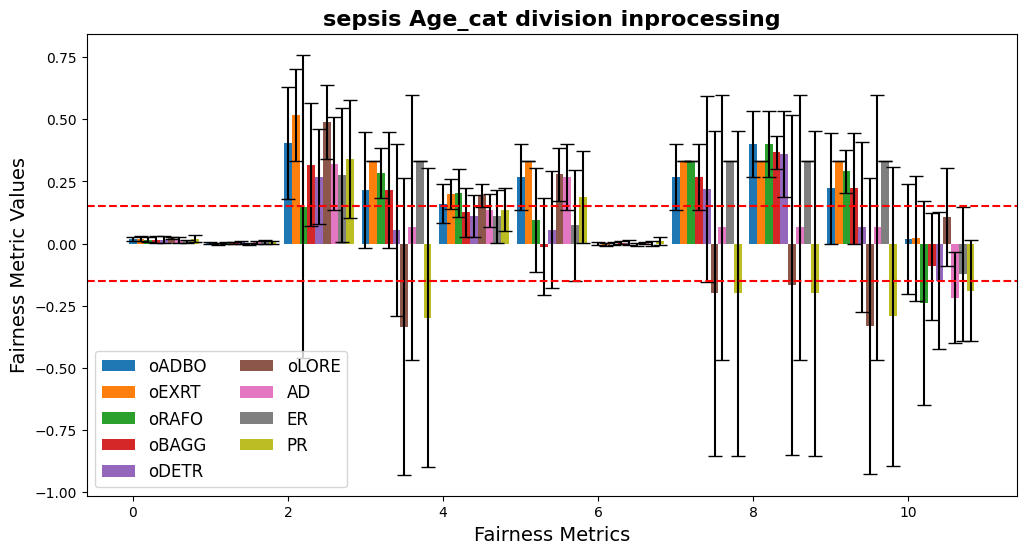

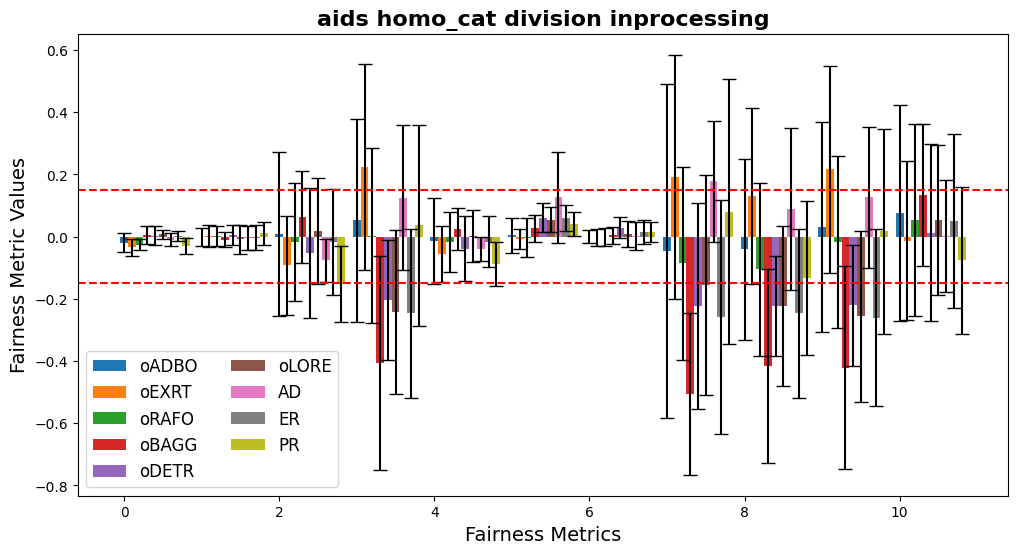

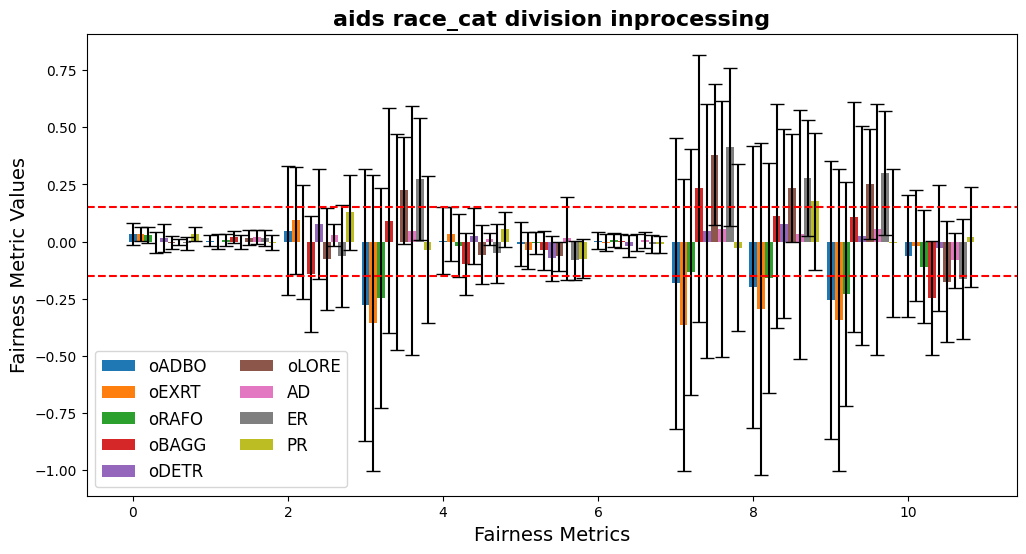

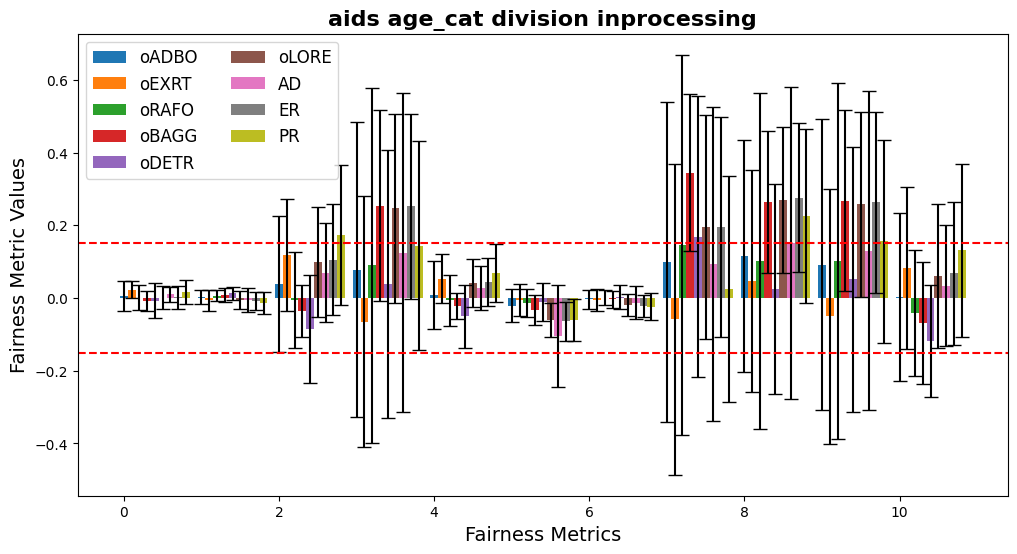

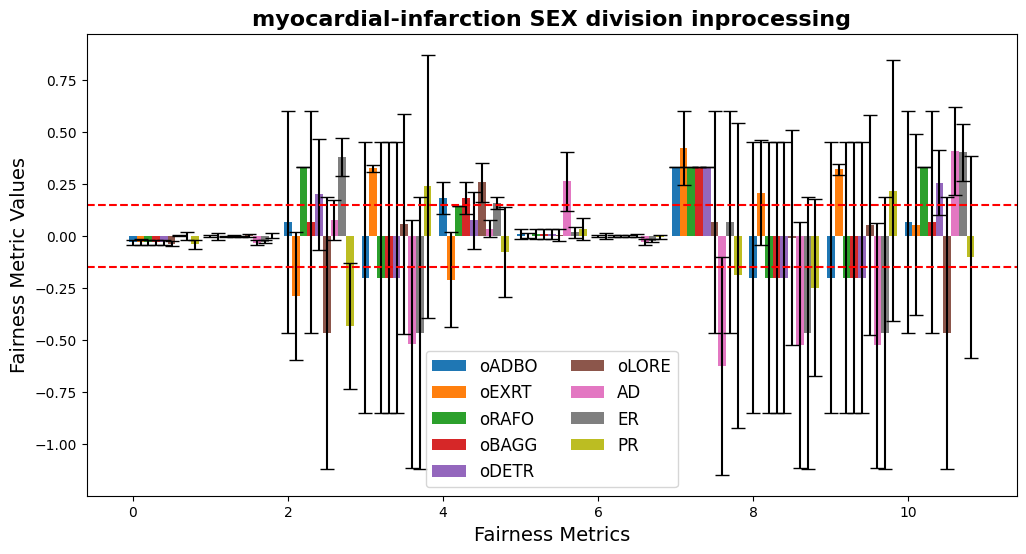

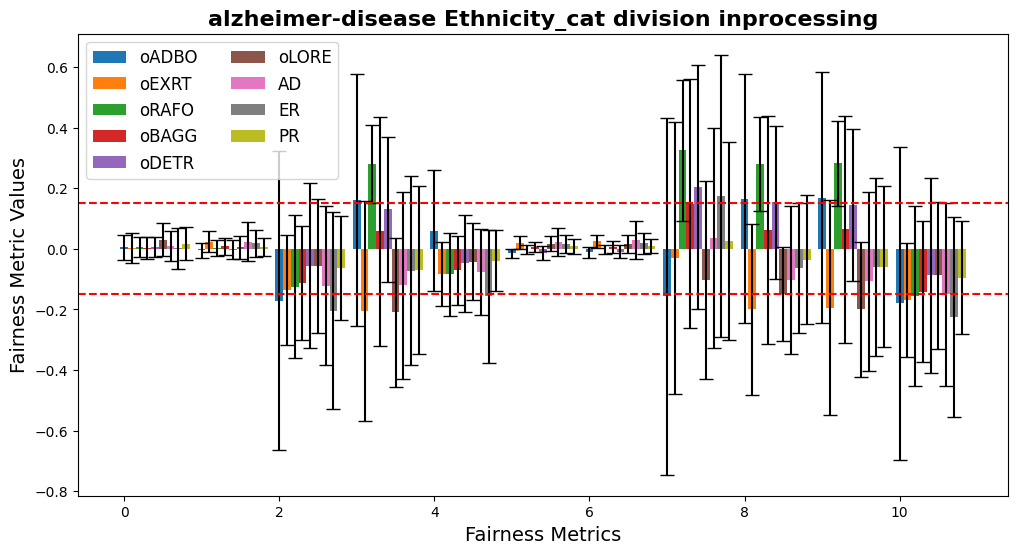

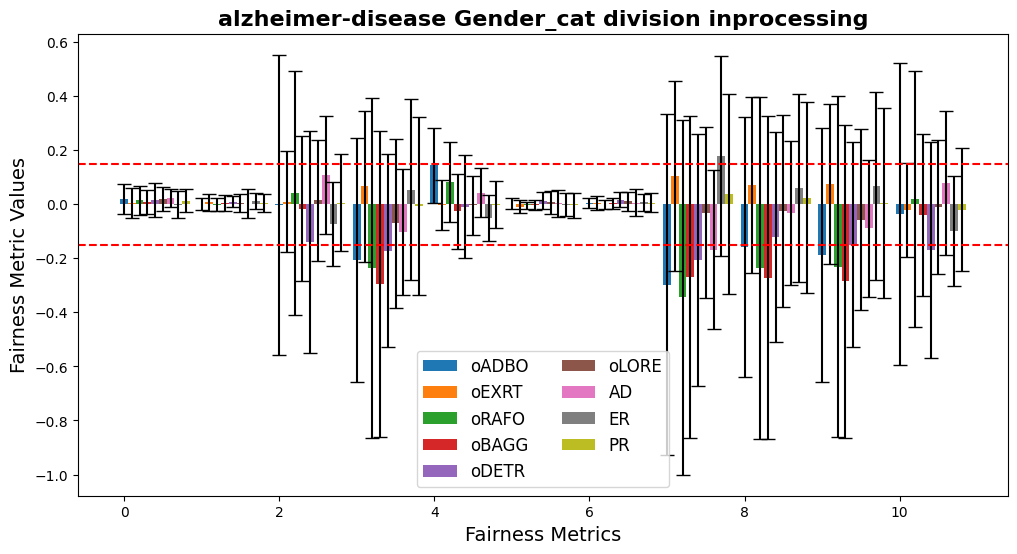

In [27]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    grouped_bar_no_model_std_dev(inprocessing_metrics[dataset_name][sensible_attribute], inprocessing_mitigation_list, "division", 'inprocessing', dataset_name, sensible_attribute)

## Display division fairness metrics in a dataframe

In [28]:
for dataset in dataset_list:
  for sensible_attribute in datasets_config[dataset]['sensible_attributes']:
    df = data_framing(inprocessing_metrics, dataset, sensible_attribute, "division", None, ["aif360-ad", "aif360-er",'aif360-pr'])
    display(df)

/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


### all three in-processing techniques, subtraction, no ML models

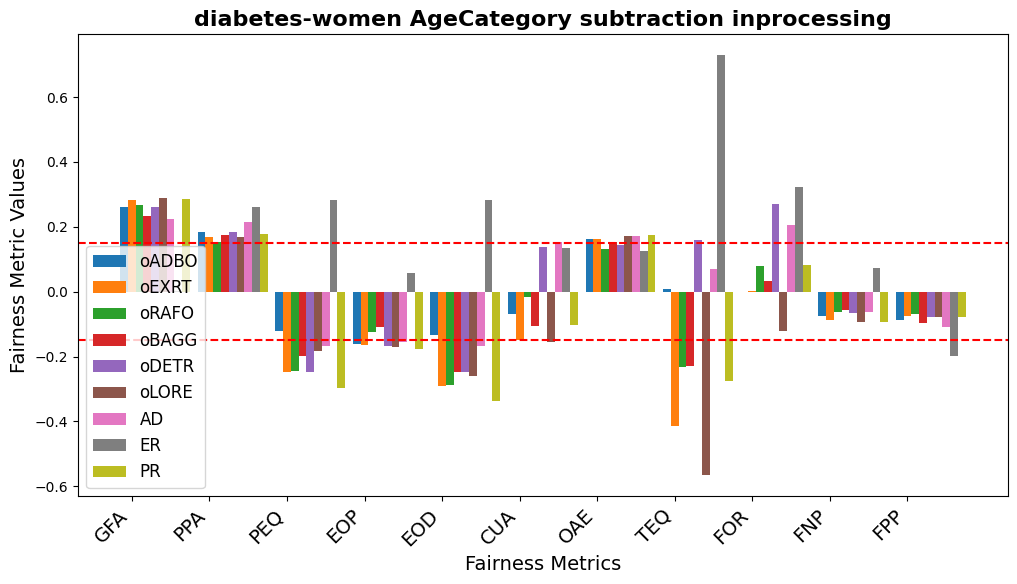

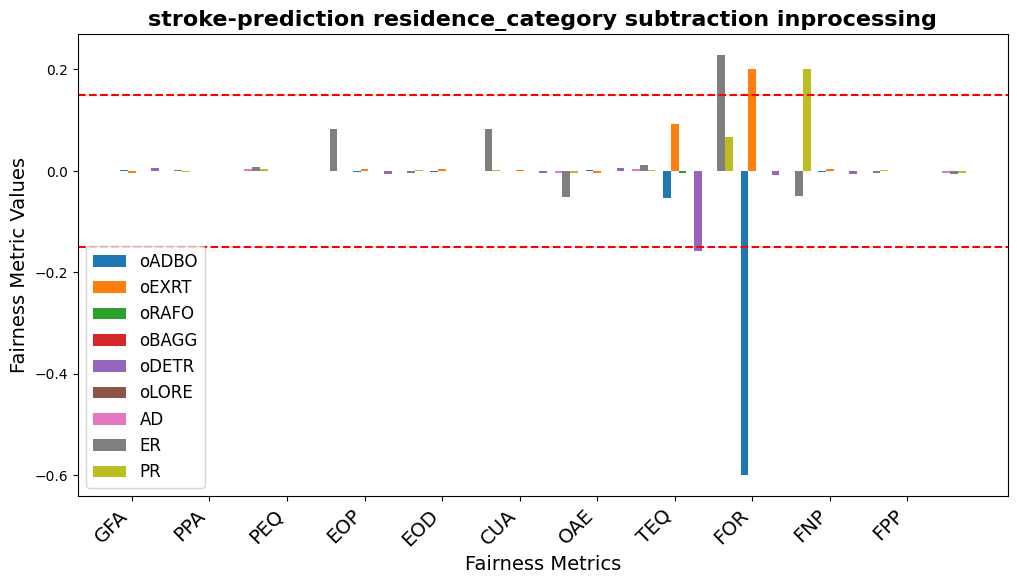

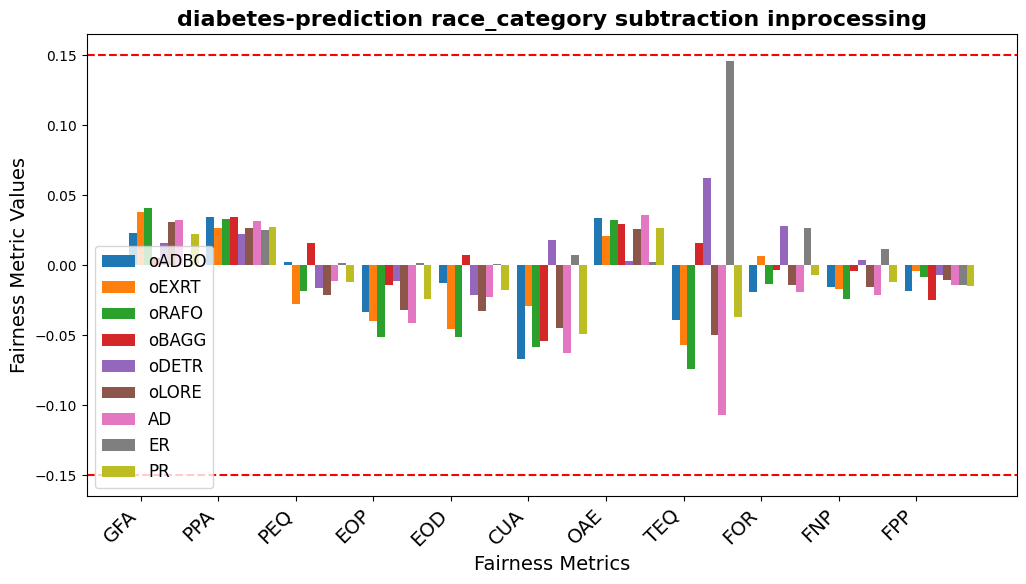

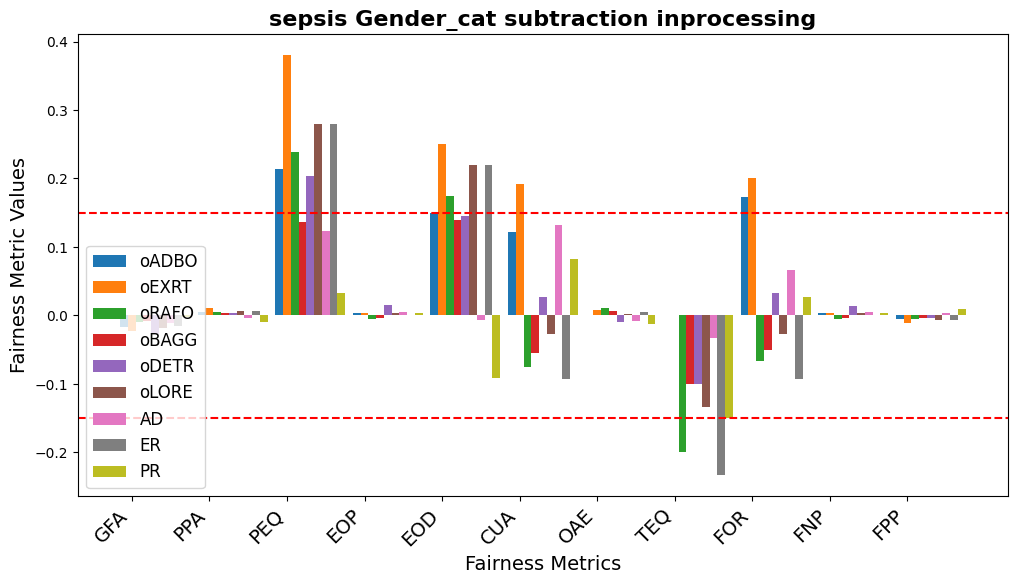

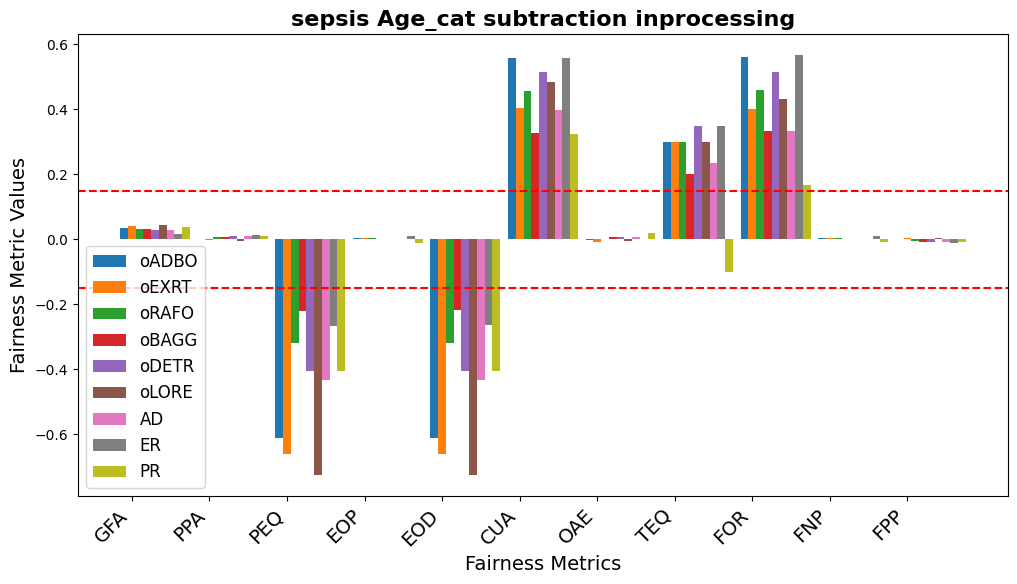

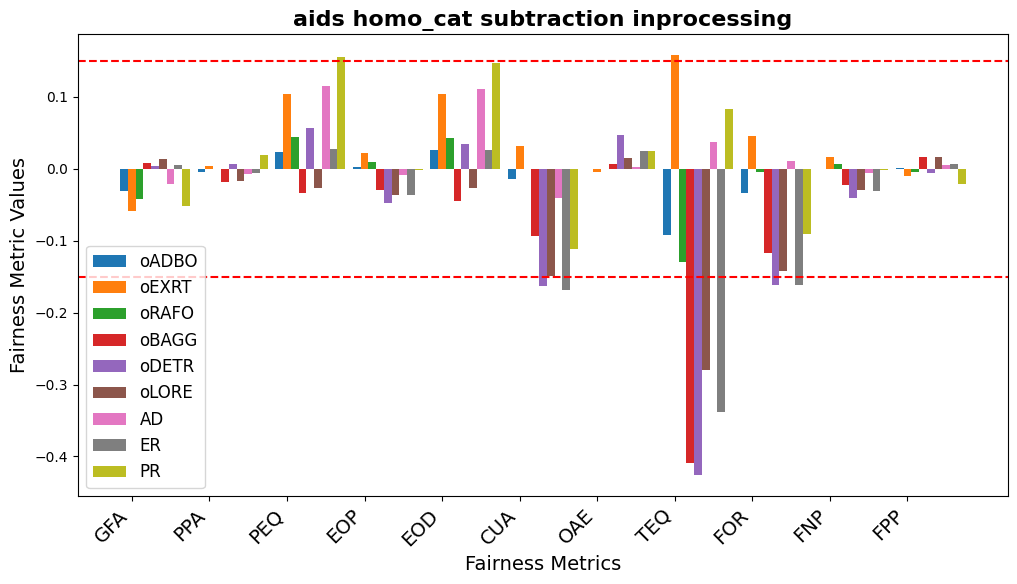

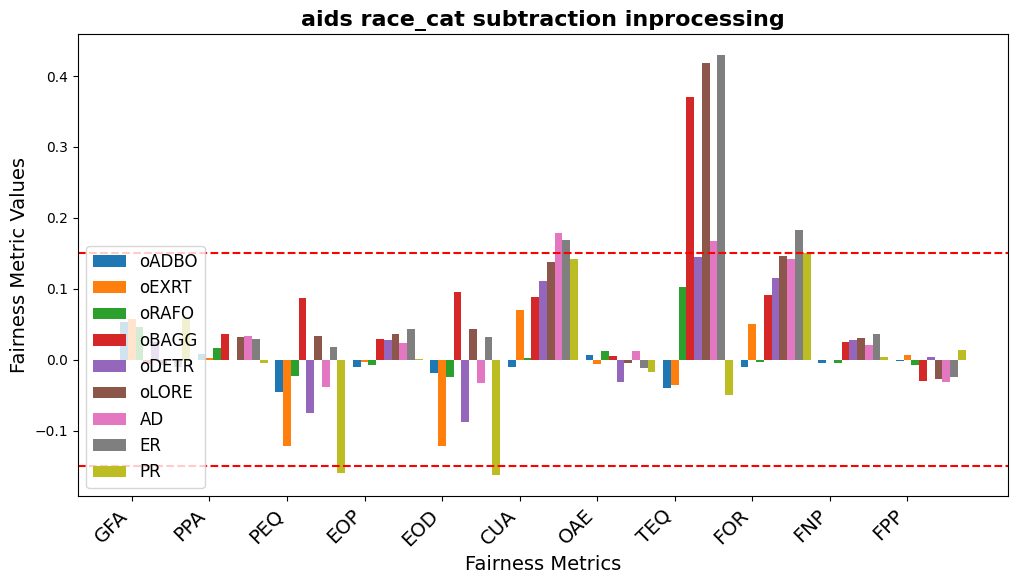

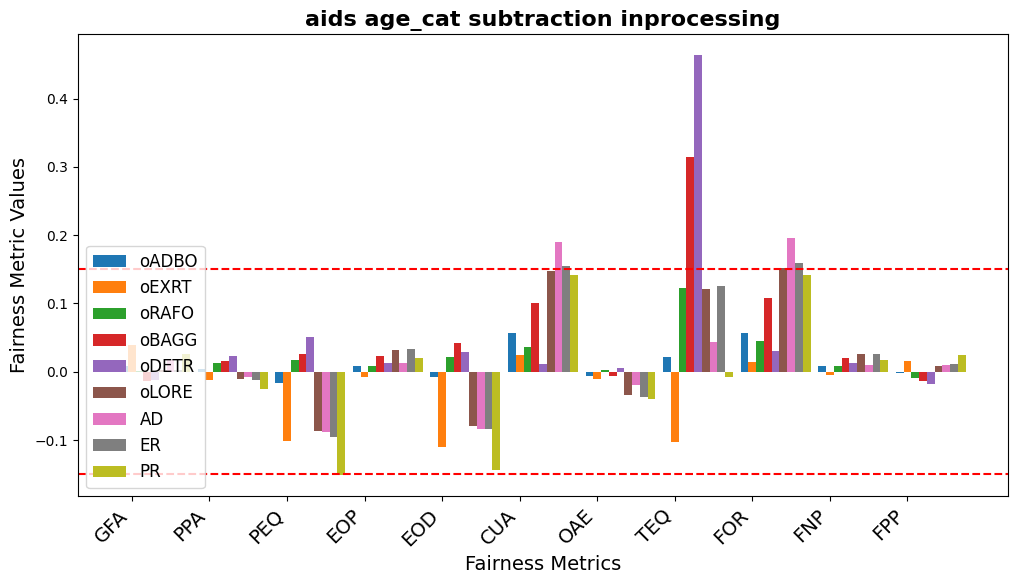

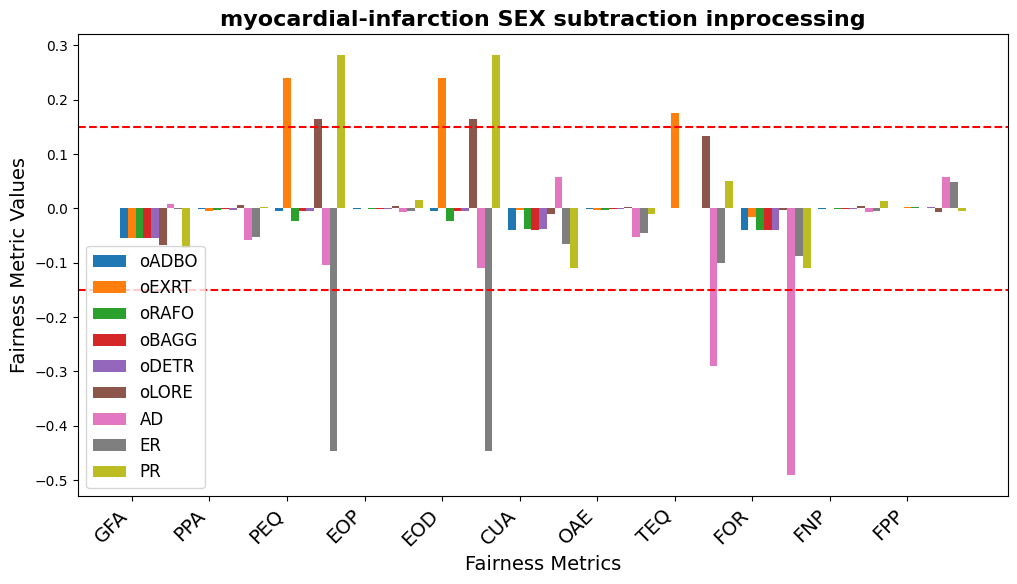

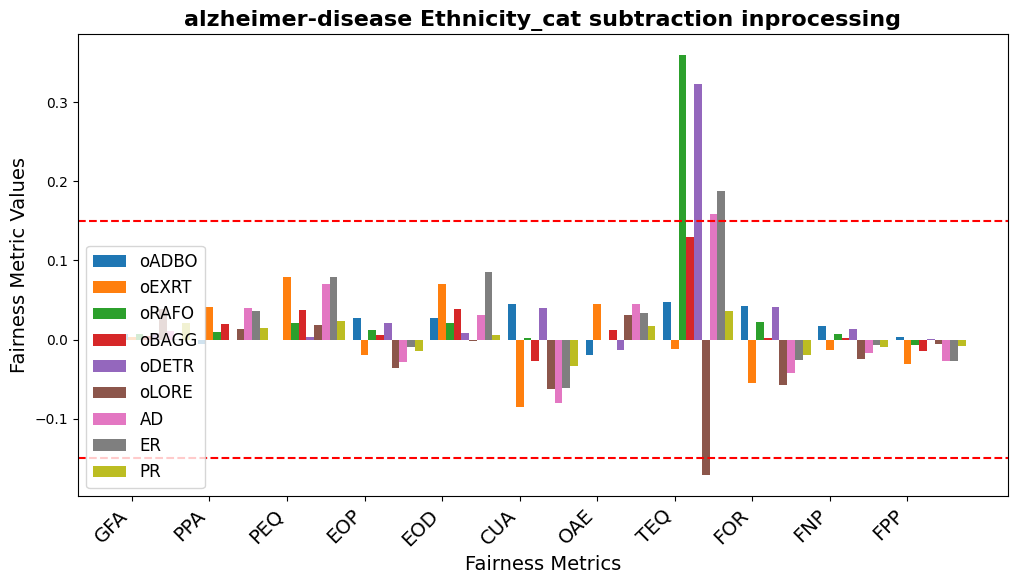

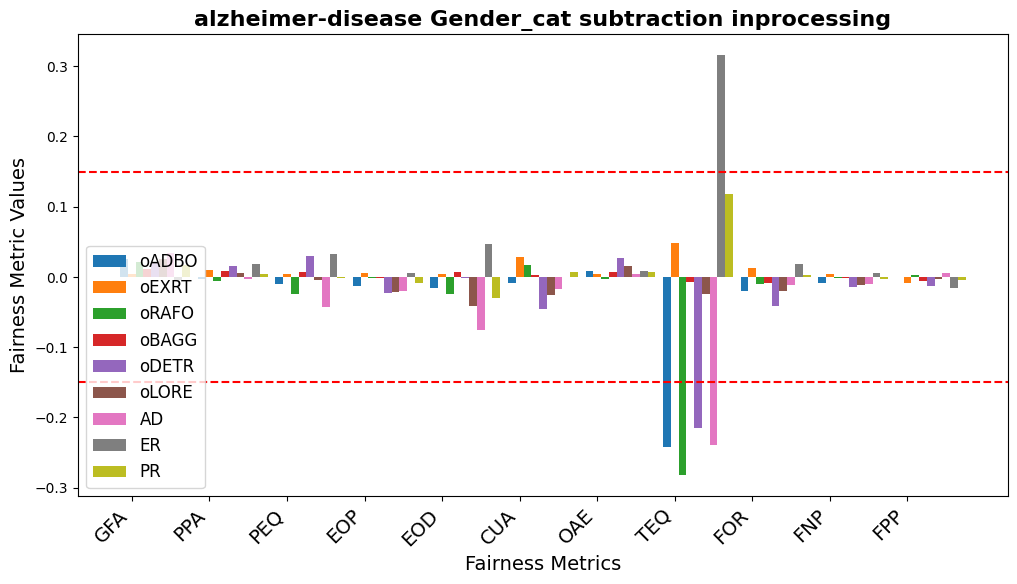

In [29]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    grouped_bar_no_model(inprocessing_metrics[dataset_name][sensible_attribute], inprocessing_mitigation_list, "subtraction", 'inprocessing', dataset_name, sensible_attribute)

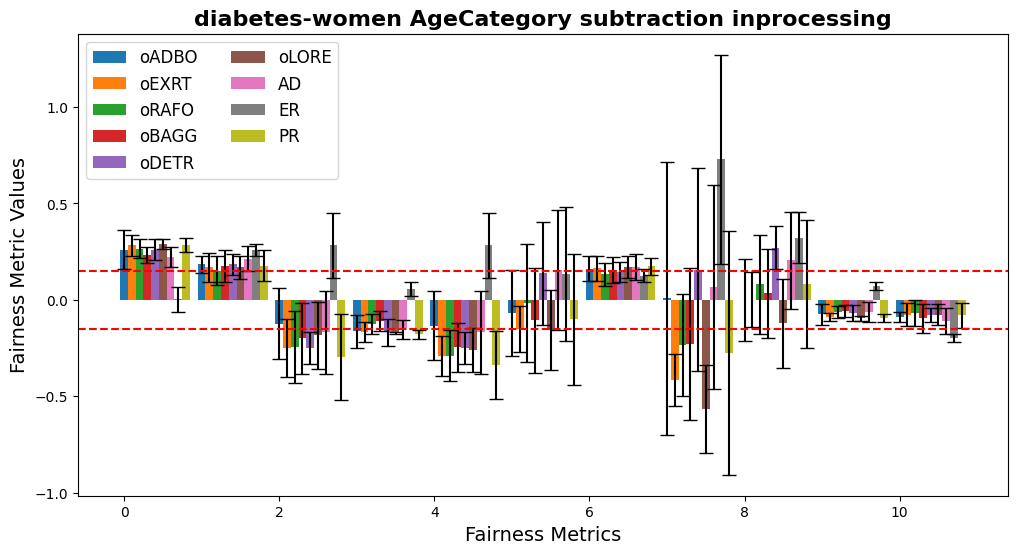

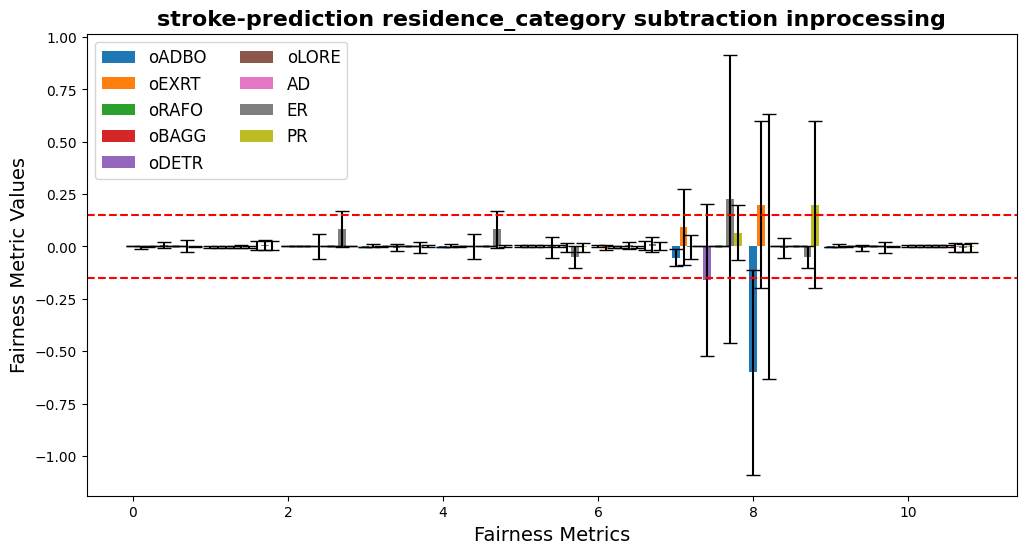

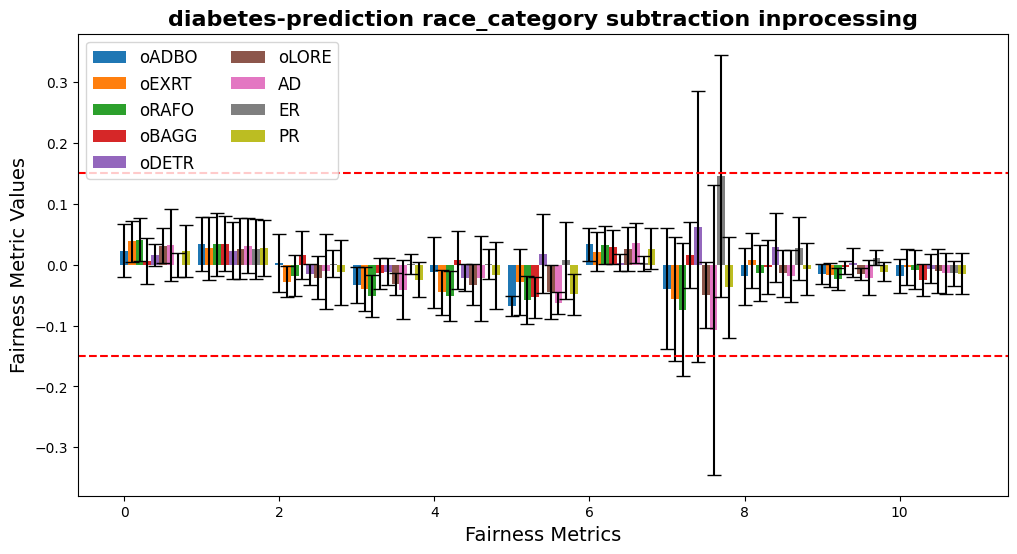

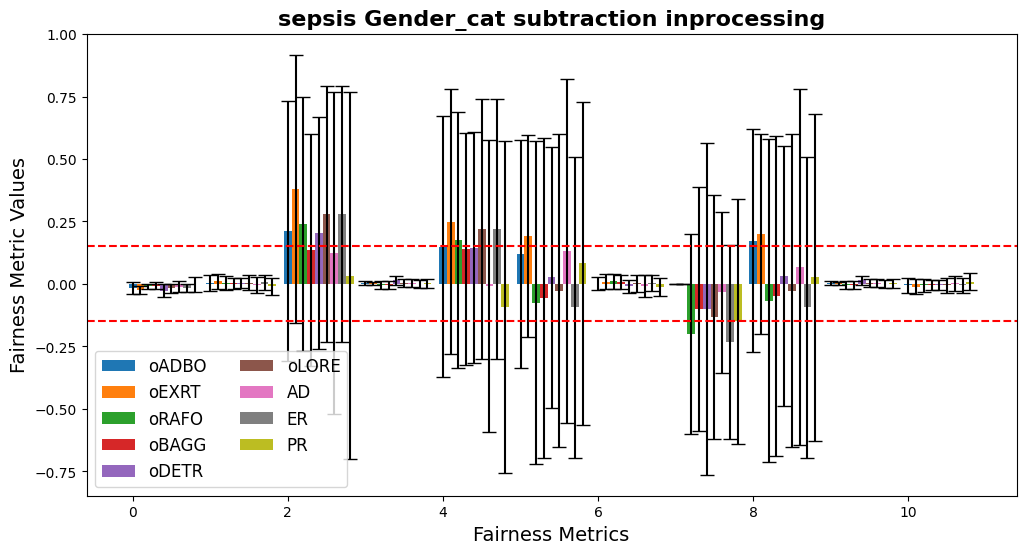

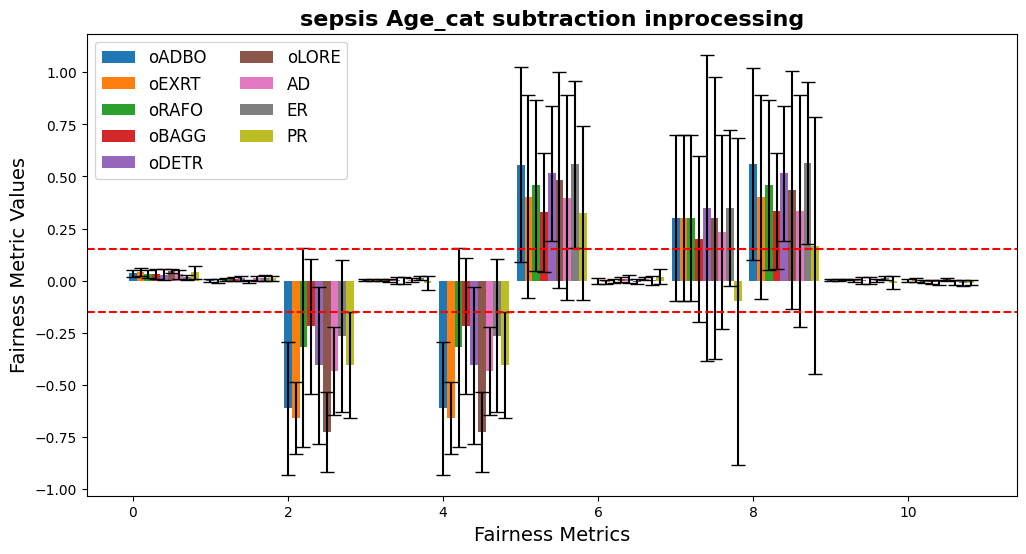

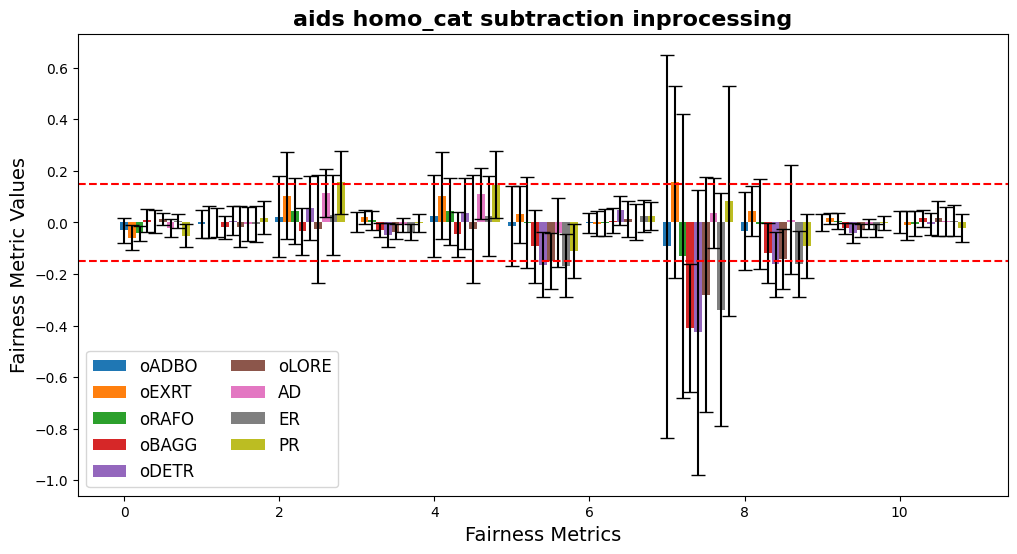

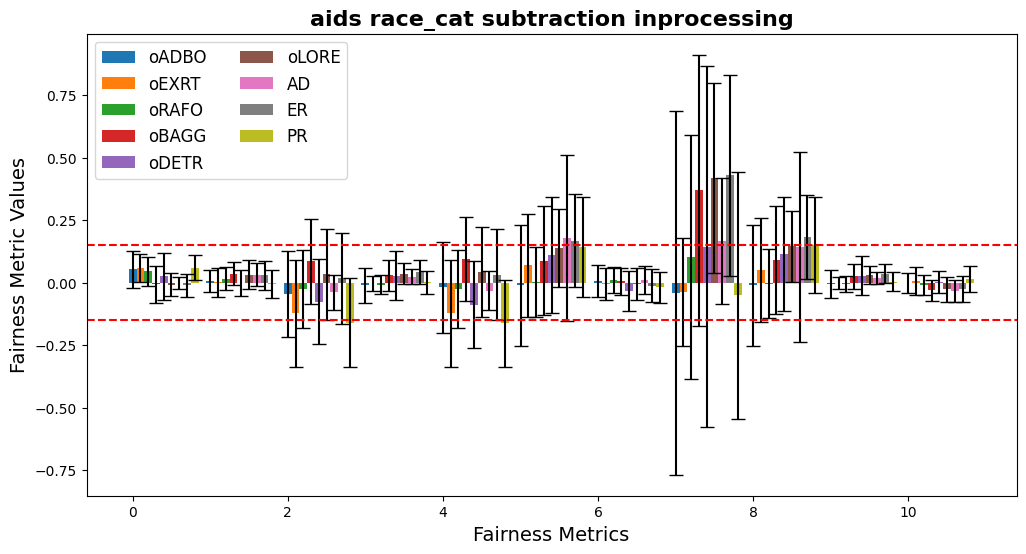

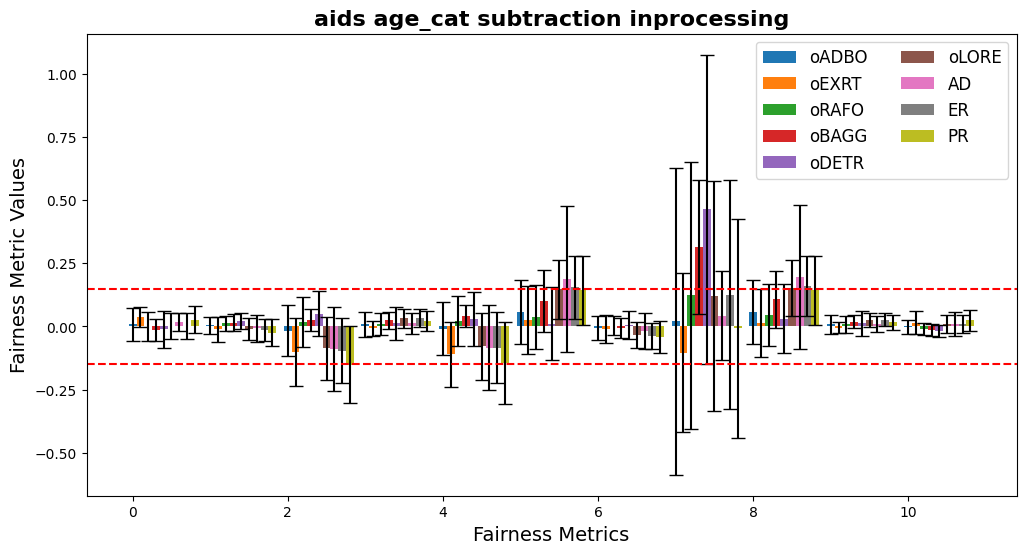

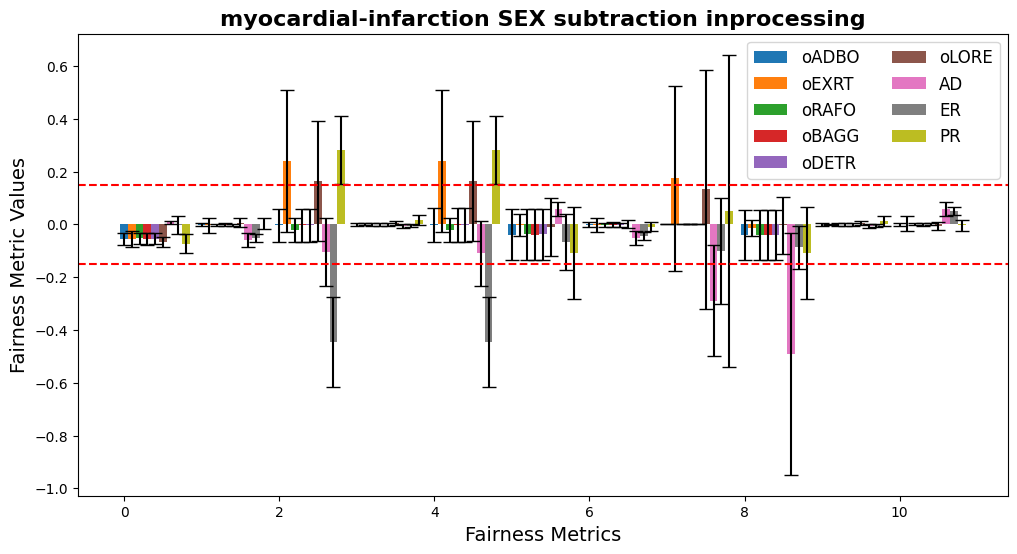

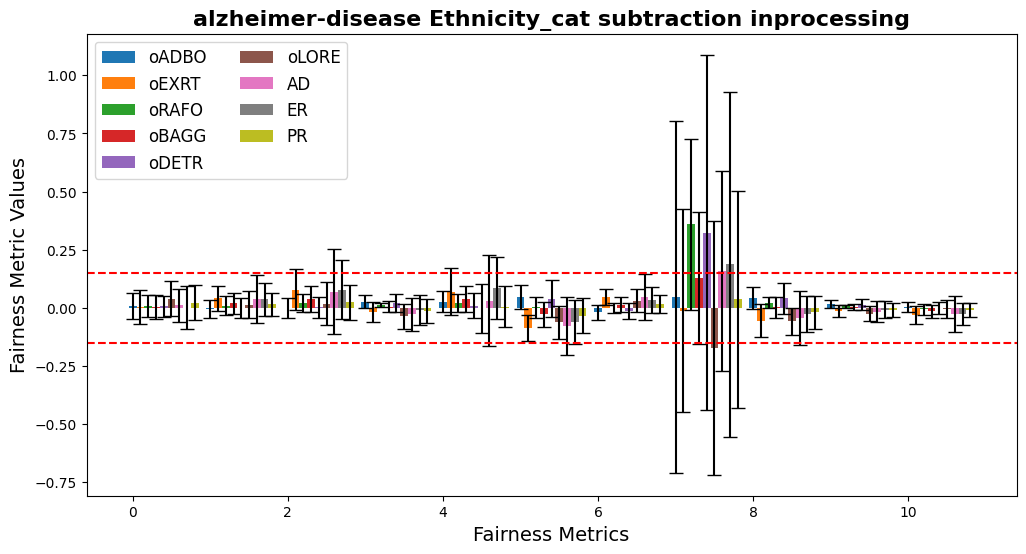

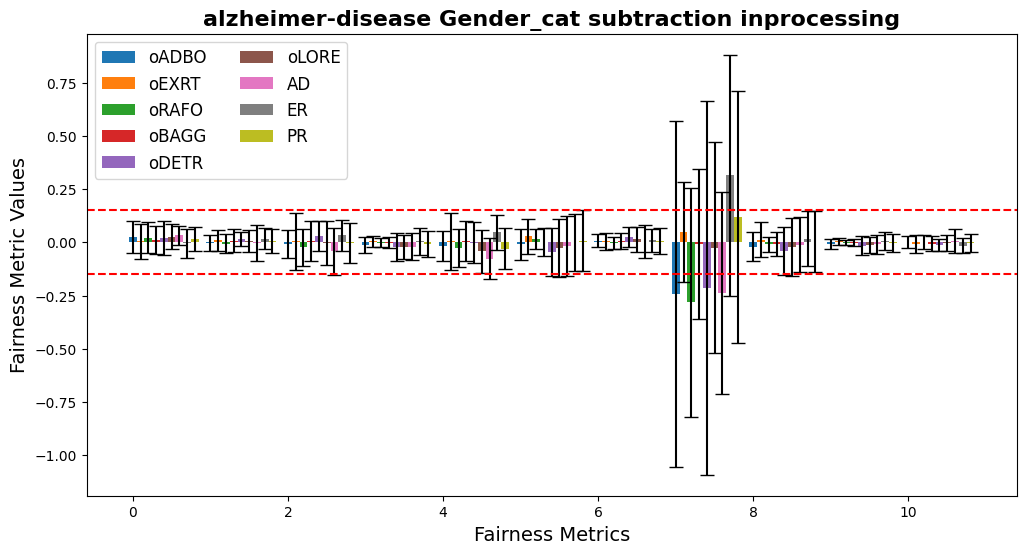

In [30]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    grouped_bar_no_model_std_dev(inprocessing_metrics[dataset_name][sensible_attribute], inprocessing_mitigation_list, "subtraction", 'inprocessing', dataset_name, sensible_attribute)

## Display subtraction fairness metrics in a dataframe

In [31]:
for dataset in dataset_list:
  for sensible_attribute in datasets_config[dataset]['sensible_attributes']:
    df = data_framing(inprocessing_metrics, dataset, sensible_attribute, "subtraction", None, ["aif360-ad", "aif360-er",'aif360-pr'])
    display(df)

/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


# Post-processing results

In [32]:
print(postprocessing_mitigation_list)

['aif360-roc', 'aif360-ce', 'fl-to', 'aif360-eo']


In [33]:
postprocessing_mitigation_list.insert(0,'original')

### Performance

In [34]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      perf_grouped_bar(performance_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [35]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', "Logistic Regression", postprocessing_mitigation_list)

accuracy      precision         recall       f1_score
Mitigation                                                            
original    0.778+/-0.044  0.711+/-0.037  0.559+/-0.054  0.624+/-0.034
aif360-roc  0.738+/-0.074  0.727+/-0.163  0.357+/-0.267  0.405+/-0.281
aif360-ce   0.766+/-0.031  0.701+/-0.046  0.503+/-0.018  0.585+/-0.020
fl-to       0.704+/-0.035  0.651+/-0.133  0.416+/-0.241  0.430+/-0.180
aif360-eo   0.729+/-0.049  0.642+/-0.060  0.446+/-0.182  0.496+/-0.135

In [36]:
perf_data_framing(performance_metrics, 'diabetes-women', 'AgeCategory', "Bagging", postprocessing_mitigation_list)

accuracy      precision         recall       f1_score
Mitigation                                                            
original    0.772+/-0.046  0.747+/-0.070  0.485+/-0.064  0.583+/-0.039
aif360-roc  0.766+/-0.045  0.745+/-0.040  0.453+/-0.061  0.560+/-0.044
aif360-ce   0.760+/-0.037  0.781+/-0.079  0.388+/-0.053  0.514+/-0.039
fl-to       0.699+/-0.036  0.555+/-0.057  0.458+/-0.041  0.498+/-0.029
aif360-eo   0.723+/-0.047  0.719+/-0.109  0.342+/-0.164  0.424+/-0.127

### all post-processing techniques, division, ML models

In [37]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar(postprocessing_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, "division", m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [38]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar_std_dev(postprocessing_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, "division", m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

## Display division fairness metrics in a dataframe

In [39]:
for dataset in dataset_list:
  for sensible_attribute in datasets_config[dataset]['sensible_attributes']:
    for m in models:
      df = data_framing(postprocessing_metrics, dataset, sensible_attribute, "division", m, postprocessing_mitigation_list)
      display(df)

/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


### all post-processing techniques, subtraction, all ML models

In [40]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar(postprocessing_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, "subtraction", m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

In [41]:
for dataset_name in dataset_list:
  for sensible_attribute in datasets_config[dataset_name]['sensible_attributes']:
    for m in models:
      grouped_bar_std_dev(postprocessing_metrics[dataset_name][sensible_attribute], postprocessing_mitigation_list, "subtraction", m, 'postprocessing', dataset_name, sensible_attribute)

Output hidden; open in https://colab.research.google.com to view.

## Display subtraction fairness metrics in a dataframe

In [42]:
for dataset in dataset_list:
  for sensible_attribute in datasets_config[dataset]['sensible_attributes']:
    for m in models:
      df = data_framing(postprocessing_metrics, dataset, sensible_attribute, "subtraction", m, postprocessing_mitigation_list)
      display(df)

/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


/content/drive/MyDrive/FairAlgorithm/source/utils/plot_utils.py:459: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_data = data.style.set_caption(title).applymap(color_cells, subset=metrics)


# Extra


## PCA alternative plot, with baseline evidenced.

In [ ]:
# Load the data
data = data_framing(overall_metrics, 'diabetes-women', "division", "Logistic Regression")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Select a baseline
baseline_algorithm = 'original'
baseline_index = data.index.get_loc(baseline_algorithm)

# Create a scatter plot
plt.figure(figsize=(10, 6))

for i, algorithm in enumerate(data.index):
    if algorithm == baseline_algorithm:
        plt.scatter(principal_components[i, 0], principal_components[i, 1], c='tab:red', label=algorithm)
    else:
        plt.scatter(principal_components[i, 0], principal_components[i, 1], c='tab:blue', label=algorithm)

# Annotate points with names
for i, algorithm in enumerate(data.index):
    plt.annotate(algorithm, (principal_components[i, 0], principal_components[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Algorithm Performance with Baseline')

# Add legend
plt.legend()

# TO DO: Distances should be calculated before the PCA
for i, algorithm in enumerate(data.index):
    if algorithm != baseline_algorithm:
        distance = euclidean(principal_components[i], principal_components[baseline_index])
        print(f"Distance between {algorithm} and {baseline_algorithm}: {distance}")

plt.show()

T-SNE experiment alternative to PCA.

In [ ]:
tsne = TSNE(n_components=2, perplexity=3)
X_r = tsne.fit_transform(vectorise(overall_metrics, 'diabetes-women', "division", "Logistic Regression"))

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']#,'tab:cyan']
ax.scatter(X_r[:, 0], X_r[:, 1], color=colors)
for i, label in enumerate(mitigation_list):
    plt.annotate(label, (X_r[:, 0][i], X_r[:, 1][i]))
plt.show()

## Heatmaps

In [ ]:
# Aggregation of metrics
def aggregate_all(metrics_dictionary, dataset, mitigation, comparison, model):
  l = []
  for metric in metrics:
    l.append(metrics_dictionary[dataset][mitigation][comparison][model][metric]["Value"])
  return np.mean(l), np.std(l)

In [ ]:
# TO DO questo richiede chiaramente che le misure vengano in qualche modo normalizzate o stiano tutte entro lo stesso intervallo e con significati quantitativi simili -> DIFFICILE
aggregate_all(overall_metrics, 'diabetes-women', 'original', "division", "Logistic Regression")

In [ ]:
# Aggregation of metrics by family
def fine_aggregation(metrics_dictionary, dataset, mitigation, comparison, model):
  groups = {'metrics_on_results': ['GroupFairness'],
            'metrics_on_FP': ['PredictiveParity', 'PredictiveEquality', 'FP'],
            'metrics_on_FN': ['EqualOpportunity', 'FORParity', 'FN'],
            'metrics_on_all': ['TreatmentEquality', 'EqualizedOdds', 'ConditionalUseAccuracyEquality', 'OverallAccuracyEquality']
            }

  aggregated_metrics = {}
  for k in groups.keys():
    support = []
    for metric in groups[k]:
      support.append(metrics_dictionary[dataset][mitigation][comparison][model][metric]["Value"])
    aggregated_metrics[k] = np.array([np.mean(support), np.std(support)])

  return aggregated_metrics

In [ ]:
fine_aggregation(overall_metrics, 'diabetes-women', 'original', "division", "Logistic Regression")

In [ ]:
sns.set()
for model in models:
  plt.figure(figsize=(10, 5))
  ax = sns.heatmap(data_framing(overall_metrics, 'diabetes-women', "division", model), annot=True)
  plt.title("Heatmap Fairness Metrics - {}".format(model))
  plt.show()